In [57]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import KFold, train_test_split
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

import pymysql
import pymysql.cursors

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import pylab
import sys
import warnings
from sklearn.utils import shuffle

from datetime import date, timedelta, datetime

import lda

# Q1 Bag of Words 


In [11]:
""" a,b

a. Combine all of the datasets into a common corpus
b. Create a word-document matrix from this corpus

The problem for this task is that, the txt files have already recorded the document-word-count;
When combined together, the documentID in the original files should change.
That being said, the documentID should be appended to one another, other than from the beginning when a new txt file were read in.
Also, assume the wordID is unified through out all txt files, 
meaning I do not need to change the wordID for each txt file when combining them together.

"""

import os
import json

name_docs=os.listdir(r"C:\Users\Jane Liu\Documents\GWU Spring2018\MachineLearning\HW5\bag_of_word")

docs = []

for i in range(np.size(name_docs)):
    file=open("C:\\Users\\Jane Liu\\Documents\\GWU Spring2018\\MachineLearning\\HW5\\bag_of_word\\"+name_docs[i])
    data=[]
    
    while 1:
        tempdata=[]
        line=file.readline()
        if not line:
            break
        tempdata=line.split(',')
        #temp = tempdata.replace('\n','')
        data.extend(tempdata)
    print('{}th txt has a length of: {}\n'.format(i, len(data)))
    
    docs.append(data) 
    

0th txt has a length of: 3710423

1th txt has a length of: 353163

2th txt has a length of: 746319



In [124]:
""" Need to take out the first three elements in each txt file:

"""

docs_removed = []
for i in range(len(docs)):
    temp = docs[i][3:]
    docs_removed.append(temp)
    

In [209]:
""" Sample Codes:

df=pd.DataFrame({'document':[]})
for i in range(1000):
    test=docs_removed[1][i].split(' ')
    results = [int(j) for j in test]
    tt = pd.DataFrame({'document': [results[0]], "{}".format(results[1]):[results[2]]})
    if '{}'.format(results[1]) in list(df.columns):
        if results[0] not in list(df['document'].tolist()):
            #df = pd.merge(df, tt, how='outer', on='document')
            df = pd.concat([df,tt], join='outer')
    else:        
        df = pd.merge(df, tt, how='outer', on='document')
        #df = pd.concat([df,tt], join='outer')
    
print(df)"""

    1001  1025  103  1051  1058  1063  1064  1079  108  1081  ...   4665  \
0    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
1    NaN   NaN  NaN   NaN   NaN   1.0   NaN   NaN  NaN   NaN  ...    NaN   
2    NaN   NaN  NaN   NaN   NaN   NaN   1.0   1.0  NaN   1.0  ...    NaN   
3    1.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  1.0   NaN  ...    NaN   
4    NaN   NaN  1.0   2.0   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
5    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
6    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
7    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
8    NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
9    NaN   1.0  NaN   NaN   1.0   NaN   NaN   NaN  NaN   NaN  ...    NaN   
10   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    NaN   
11   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...    2.0   

    4824  4

In [213]:
""" Please DO NOT Run this again, took a lot of time. Instead, if you would like to try out, there is a sample code above.

You could just comment out, and verify that this is working.

"""

""" KOS:

"""
# New empty dataframe for storing the created ones:
df=pd.DataFrame({'document':[]})

# Loop through all the elements in the KOS:
for i in range(len(docs_removed[1])):
    
    # '1 61 2\n' is the original element, need to split on the space:
    test=docs_removed[1][i].split(' ')
    # Convert to integers:
    results = [int(j) for j in test]
    
    # Create small dataframes:
    tt = pd.DataFrame({'document': [results[0]], "{}".format(results[1]):[results[2]]})
    
    # Use if to determine whether I need to merge or concatenate:
    # Noted that if the wordID has already appeared in the big dataframe, which means it appeared in the previous document,
    # then I need to use concat, since merge will cause the problem of duplication as something like: 441_x, 441_y.
    if '{}'.format(results[1]) in list(df.columns):
        
        # There are duplicated records in one document, filter them out:
        if results[0] not in list(df['document'].tolist()):
            df = pd.concat([df,tt], join='outer')
    else:         
        df = pd.merge(df, tt, how='outer', on='document')
    
df.head(8)

,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,991,992,993,994,995,996,997,998,999,document
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [225]:
# Fill Nans with 0:

temp_KOS = df.copy()
df_KOS = temp_KOS.fillna(0)
df_KOS.head()

,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,991,992,993,994,995,996,997,998,999,document
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [229]:
# Write df_KOS out as csv for futher reference:
df_KOS.to_csv("df_KOS.csv", encoding='utf8', index=False)

In [75]:
""" That I can read-in from csv for future:

"""
KOS = pd.read_csv("df_KOS.csv")
print(KOS.shape)
KOS.tail()

(3430, 6907)


,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,991,992,993,994,995,996,997,998,999,document
3425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3426
3426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3427
3427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3428
3428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3429
3429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3430


In [76]:
NIPS = pd.read_csv("df_NIPS.csv")
print(NIPS.shape)
NIPS.tail()

(1500, 12376)


,1,10,1000,10000,10001,10002,10003,10004,10005,10006,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,document
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1496
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1497
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1498
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1499
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500


In [77]:
df_KOS = KOS.copy()
df_KOS.drop(['document'], axis=1, inplace=True)
print(df_KOS.shape)

df_NIPS = NIPS.copy()
df_NIPS.drop(['document'], axis=1, inplace=True)
print(df_NIPS.shape)

(3430, 6906)
(1500, 12375)


In [15]:
data = df_KOS.append(df_NIPS)
temp_data = data.copy()
df = temp_data.fillna(0)
df.head()
print(df.shape)
df.tail()

(4930, 12401)


,1,10,100,1000,10000,10001,10002,10003,10004,10005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Save df as csv for further use:
df.to_csv("df_Q1.csv", encoding='utf8', index=False)

### c.	Using SKLearn, find the truncated singular value decomposition of this matrix, retaining the first 100 dimensions

In [36]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
svd.fit(df)

# Eigen vector:
eig_vector = svd.components_
#print(eig_vector)

# Eigen values:
eig_val = svd.explained_variance_

print("Eigen Values: {}".format(eig_val))

Eigen Values: [ 4.06404797  3.79717346  2.05029508  1.6383841   1.28533881  1.23876108
  1.15891303  1.06292239  1.01086441  0.99653254  0.89678315  0.88421324
  0.85705552  0.83292848  0.8149121   0.77454972  0.7563543   0.7548127
  0.70860911  0.70315024  0.68386772  0.6501064   0.64753285  0.64595137
  0.63980735  0.6396735   0.595328    0.5755068   0.5748661   0.57221267
  0.55454342  0.53957616  0.5091565   0.50527856  0.47810104  0.47572847
  0.47056745  0.46103149  0.4489218   0.44853757  0.44171104  0.417244
  0.41705086  0.40807075  0.39745008  0.39535951  0.39326815  0.37965307
  0.37642421  0.37377056  0.37243307  0.36726936  0.3670303   0.36310569
  0.36066691  0.36057685  0.35988022  0.35744291  0.35277059  0.3485869
  0.34822266  0.34576907  0.34334357  0.34101877  0.33948221  0.32979086
  0.32664121  0.32054566  0.31487143  0.31448721  0.31361413  0.31160953
  0.30942493  0.30762124  0.30689953  0.30489398  0.3023813   0.29582965
  0.29429629  0.2935107   0.29161899  0.2

In [207]:
var_exp=np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4)*100)
print("Cumulative variances explained: {}".format(var_exp))

Cumulative variances explained: [  3.93   7.61   9.59  11.18  12.42  13.62  14.74  15.77  16.75  17.71
  18.58  19.44  20.27  21.08  21.87  22.62  23.35  24.08  24.77  25.45
  26.11  26.74  27.37  28.    28.62  29.24  29.82  30.38  30.94  31.49
  32.03  32.55  33.04  33.53  33.99  34.45  34.91  35.36  35.79  36.22
  36.65  37.05  37.45  37.85  38.23  38.61  38.99  39.36  39.72  40.08
  40.44  40.8   41.16  41.51  41.86  42.21  42.56  42.91  43.25  43.59
  43.93  44.26  44.59  44.92  45.25  45.57  45.89  46.2   46.5   46.8   47.1
  47.4   47.7   48.    48.3   48.6   48.89  49.18  49.46  49.74  50.02
  50.3   50.58  50.86  51.13  51.4   51.66  51.92  52.18  52.44  52.69
  52.93  53.17  53.41  53.65  53.89  54.12  54.35  54.58  54.81]


In [37]:
# Create loading:
loadings = eig_vector.T * np.sqrt(svd.explained_variance_)
print(loadings)

[[ -6.69613700e-14   2.01196220e-13   1.15790413e-12 ...,   1.35519377e-08
   -6.93715960e-08   3.34668969e-08]
 [  2.87770345e-06   2.73308895e-09   3.80276406e-08 ...,   4.82442473e-06
   -1.42934685e-05  -2.78248460e-05]
 [  7.13877858e-07   3.42041175e-09   1.42883934e-06 ...,   5.30191034e-06
   -1.34388379e-05   4.01030553e-07]
 ..., 
 [  5.78989824e-08   4.71899918e-08   1.37275947e-07 ...,   3.70175547e-05
   -3.07772700e-04   4.89878144e-04]
 [  3.37182268e-08   1.32888060e-08   6.56441175e-08 ...,   1.53400148e-03
   -1.87776581e-04   7.75970931e-04]
 [  2.28334375e-08   2.79738597e-08   4.52910763e-06 ...,  -1.44470132e-06
   -1.55450786e-05   1.51447401e-05]]


In [38]:
loading_df = pd.DataFrame(loadings)

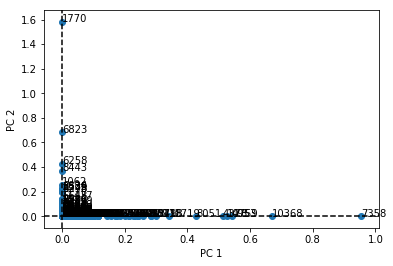

In [214]:
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = list(df.columns)

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[1])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(12401), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[1].iloc[i]))

plt.show()

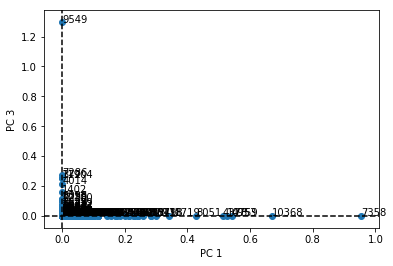

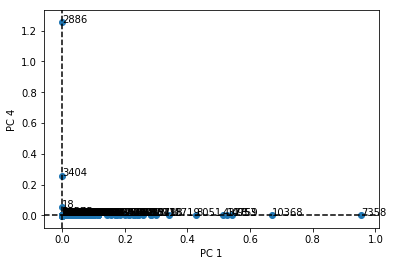

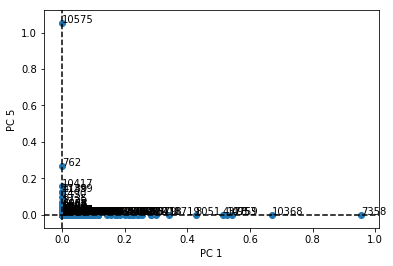

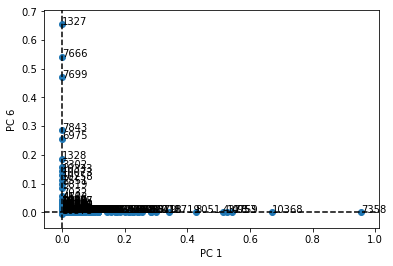

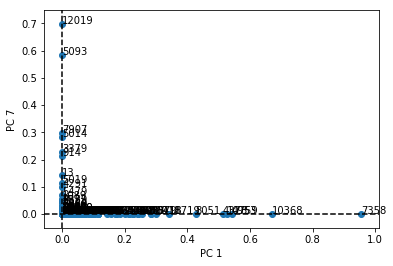

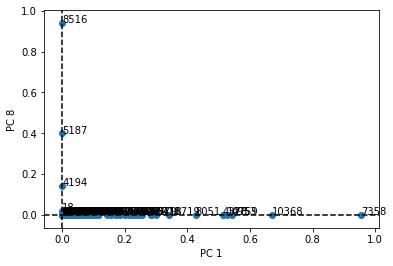

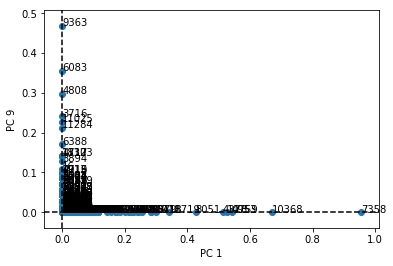

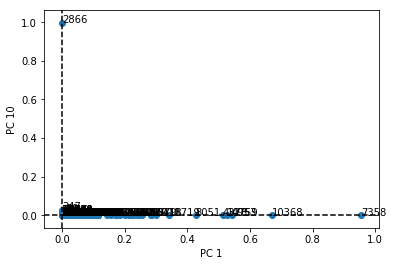

In [39]:
for l in range(2, 10):
    
    fig, ax = plt.subplots()
    ax.scatter(loading_df[0], loading_df[l])

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC {}'.format((l+1)))
    ax.axvline(0, color='k', linestyle='--')
    ax.axhline(0, color='k', linestyle='--')

    for i, f in zip(range(12401), features):
        ax.annotate(f, (loading_df[0].iloc[i],loading_df[l].iloc[i]))

    plt.show()

### d.	Now, retain dimensions 2-101

In [40]:
""" 100 dimensions with 2-101:

"""

svd = TruncatedSVD(n_components=101, random_state=42)
svd.fit(df)

# Eigen vector:
eig_vector = svd.components_
#print(eig_vector)

# Eigen values:
eig_val = svd.explained_variance_

# Eigen vlues 2-101:
print("Eigen Values: {}".format(eig_val[1:]))

Eigen Values: [ 3.79717346  2.05029509  1.63838409  1.28533882  1.23876113  1.15891298
  1.06292243  1.01086493  0.99653247  0.89678325  0.88421423  0.85705626
  0.83292853  0.81491171  0.77454977  0.75635438  0.75481283  0.70860871
  0.70314854  0.68386768  0.65010439  0.64753498  0.64594371  0.63982388
  0.63965371  0.59532974  0.5755414   0.57485942  0.57221038  0.55456028
  0.53962945  0.50915739  0.50535539  0.47808321  0.47572929  0.47059536
  0.46108612  0.44895361  0.44857747  0.44175944  0.41689199  0.41736726
  0.40798588  0.39770351  0.3950104   0.39323608  0.38018354  0.37643554
  0.37521018  0.37142485  0.36774842  0.36684161  0.36331235  0.36056153
  0.36039057  0.35944417  0.35774953  0.3539788   0.34845744  0.34809627
  0.34519358  0.34273591  0.34199325  0.34005401  0.33075974  0.32785264
  0.31851975  0.3164143   0.3176077   0.31368468  0.31207474  0.30982618
  0.30887259  0.30687533  0.30364496  0.30261466  0.29717035  0.29510001
  0.29385234  0.29077686  0.28811908 

In [29]:
print(eig_val[1:101].shape)

(100,)


In [41]:
# Create loading for eigen vectors from 2 to 101:
loadings = eig_vector[1:].T * np.sqrt(eig_val[1:])
print(loadings)

[[ -5.09307871e-14  -4.05882783e-12   8.52694520e-14 ...,  -4.99261889e-08
    3.36481675e-08  -2.92101773e-09]
 [  2.70204962e-09   3.65897387e-08   9.53790736e-08 ...,   2.67234548e-05
    2.81102250e-05  -1.74381066e-05]
 [  3.41807948e-09   1.42879316e-06   6.88127065e-08 ...,   1.91163869e-05
   -8.72616493e-06  -7.08905163e-06]
 ..., 
 [  4.71853113e-08   1.40179390e-07   2.26297218e-08 ...,   8.37877630e-04
   -3.41784379e-04  -4.89644371e-04]
 [  1.08182609e-08  -3.92222118e-09  -4.18566589e-08 ...,  -1.98748321e-03
    5.04732068e-04   2.77009747e-03]
 [  2.80089032e-08   4.53053870e-06   1.94302938e-05 ...,   2.31324201e-05
   -2.70672169e-06  -3.95693101e-05]]


In [31]:
print(loadings.shape)

(12401, 100)


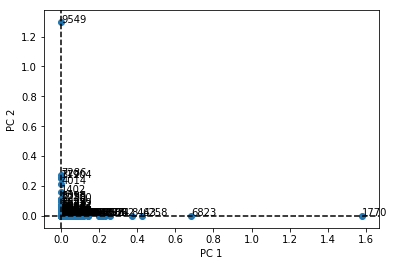

In [32]:
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = list(df.columns)

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[1])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(12401), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[1].iloc[i]))

plt.show()

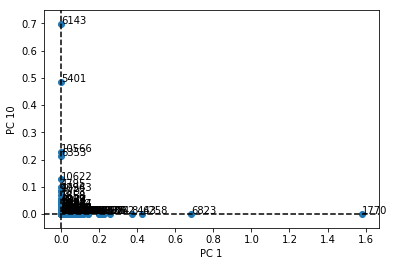

In [34]:
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = list(df.columns)

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[9])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 10')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(12401), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[9].iloc[i]))

plt.show()

### e.	Determine the centroid of each corpus from the Bag of Words dataset in LSA space.

In [56]:
""" Centroids:

"""
#print(loading_df.shape)
centroids = loading_df.mean(axis=0)
centroids

0     0.001776
1     0.000740
2     0.000371
3     0.000136
4     0.000272
5     0.000344
6     0.000264
7     0.000129
8     0.000995
9     0.000096
10    0.000267
11    0.000850
12    0.000084
13    0.000081
14    0.000145
15    0.000246
16    0.000940
17    0.000071
18    0.000093
19    0.000123
20    0.000310
21    0.000409
22    0.000132
23    0.000227
24    0.000082
25    0.000033
26    0.000283
27    0.000093
28    0.000087
29    0.000325
        ...   
70    0.000092
71    0.000356
72    0.000061
73   -0.000006
74   -0.000021
75   -0.000098
76    0.000059
77    0.000026
78   -0.000051
79    0.000053
80    0.000048
81    0.000232
82    0.000023
83    0.000182
84    0.000053
85    0.000397
86   -0.000108
87   -0.000039
88    0.000106
89    0.000194
90   -0.000054
91    0.000244
92    0.000081
93   -0.000045
94   -0.000019
95    0.000015
96    0.000010
97    0.000022
98   -0.000010
99    0.000156
Length: 100, dtype: float64

### f. Determine the average cosine similarity between documents within in each corpus. Next, determine the average cosine similarity between documents across corpora.

1. Corpora: KOS and NIPS.

In [84]:
""" Now I will calculate the LSA with 100 components using KOS and NIPS corpus respectively. 

"""
lsa_KOS = TruncatedSVD(n_components=100, random_state=42)
KOS_LSA = lsa_KOS.fit_transform(df_KOS)

lsa_NIPS = TruncatedSVD(n_components=100, random_state=42)
NIPS_LSA = lsa_NIPS.fit_transform(df_NIPS)

In [85]:
print(lsa_KOS.components_.shape)

(100, 6906)


In [87]:
component_list = []
for i in range(1,101):
    component_name = "component" + str(i) 
    component_list.append(component_name)

# Normalize the eigen values, so that they are all in [0,1]
normalizer = Normalizer(copy=False)
norm_KOS_LSA = normalizer.fit_transform(KOS_LSA)
norm_NIPS_LSA = normalizer.fit_transform(NIPS_LSA)

# attch the LSA result with each documents: KOS
KOS_component_and_word = pd.DataFrame(lsa_KOS.components_,index = component_list,columns = list(df_KOS.columns))
KOS_component_and_document = pd.DataFrame(norm_KOS_LSA, index = list(df_KOS.index), columns = component_list)
KOS_component_and_word_T = pd.DataFrame(lsa_KOS.components_.T,index = list(df_KOS.columns),columns = component_list)
KOS_component_and_document_T = pd.DataFrame(norm_KOS_LSA.T, index = component_list, columns = list(df_KOS.index))

# attch the LSA result with each documents: NIPS
NIPS_component_and_word = pd.DataFrame(lsa_NIPS.components_,index = component_list,columns = list(df_NIPS.columns))
NIPS_component_and_document = pd.DataFrame(norm_NIPS_LSA, index = list(df_NIPS.index), columns = component_list)
NIPS_component_and_word_T = pd.DataFrame(lsa_NIPS.components_.T,index = list(df_NIPS.columns),columns = component_list)
NIPS_component_and_document_T = pd.DataFrame(norm_NIPS_LSA.T, index = component_list, columns = list(df_NIPS.index))

In [89]:
# Similarity scores:
KOS_topic_1_keyword_document = KOS_component_and_document.iloc[0]
KOS_topic_1_keyword_document_value=KOS_topic_1_keyword_document.values

NIPS_topic_1_keyword_document = NIPS_component_and_document.iloc[0]
NIPS_topic_1_keyword_document_value=NIPS_topic_1_keyword_document.values

KOS_similarity_list = []
NIPS_similarity_list = []

for i in range(1,KOS_component_and_document.shape[0]):
    this_document = KOS_component_and_document.iloc[i]
    this_document_value = this_document.values
    
    KOS_similarity_score = np.dot(this_document_value, KOS_topic_1_keyword_document_value)
    KOS_similarity_list.append(KOS_similarity_score)

for i in range(1,NIPS_component_and_document.shape[0]):
    this_document = NIPS_component_and_document.iloc[i]
    this_document_value = this_document.values
    
    NIPS_similarity_score = np.dot(this_document_value, NIPS_topic_1_keyword_document_value)
    NIPS_similarity_list.append(NIPS_similarity_score)

In [90]:
print("KOS Topic 1 average cosine similarity score:")
print(np.round(np.mean(KOS_similarity_list), 4))
print()
print("NIPS Topic 1 average cosine similarity score:")
print(np.round(np.mean(NIPS_similarity_list), 4))

KOS Topic 1 average cosine similarity score:
0.0135

NIPS Topic 1 average cosine similarity score:
0.0199


#### Cosine Similarity:
2. Common corpus.

In [92]:
""" LSA:

"""
lsa = TruncatedSVD(n_components=100, random_state=42)
X_LSA = lsa.fit_transform(df)

In [94]:
component_list = []
for i in range(1,101):
    component_name = "component" + str(i) 
    component_list.append(component_name)
    
normalizer = Normalizer(copy=False)
df_X_LSA = normalizer.fit_transform(X_LSA)

# attch the LSA result with each documents. 
pd_component_and_word = pd.DataFrame(lsa.components_,index = component_list,columns = list(df.columns))
pd_component_and_document = pd.DataFrame(df_X_LSA, index = list(df.index), columns = component_list)
pd_component_and_word_T = pd.DataFrame(lsa.components_.T,index = list(df.columns),columns = component_list)
pd_component_and_document_T = pd.DataFrame(df_X_LSA.T, index = component_list, columns = list(df.index))


In [95]:
topic_1_keyword_document = pd_component_and_document.iloc[0]
topic_1_keyword_document_value=topic_1_keyword_document.values

topic_2_keyword_document = pd_component_and_document.iloc[1]
topic_2_keyword_document_value=topic_2_keyword_document.values

topic1_similarity_list = []
topic2_similarity_list = []

In [96]:
for i in range(0,pd_component_and_document.shape[0]):
    this_document = pd_component_and_document.iloc[i]
    this_document_value = this_document.values
    
    # why are we using not product here?
    topic1_similarity_score = np.dot(this_document_value, topic_1_keyword_document_value)
    topic2_similarity_score = np.dot(this_document_value, topic_2_keyword_document_value)
    topic1_similarity_list.append(topic1_similarity_score)
    topic2_similarity_list.append(topic2_similarity_score)

In [97]:
print("Topic 1 average cosine similarity score:")
print(np.round(np.mean(topic1_similarity_list), 4))
print()
print("Topic 2 average cosine similarity score:")
print(np.round(np.mean(topic2_similarity_list), 4))

Topic 1 average cosine similarity score:
0.0968

Topic 2 average cosine similarity score:
0.05


# Q2 Tf-idf Weighting 

In [99]:
""" TfidfTransformer:

"""

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tf = tfidf.fit_transform(df)

In [103]:
print(tf[0])

  (0, 12213)	0.0666528403849
  (0, 11437)	0.0666528403849
  (0, 11182)	0.0315777089756
  (0, 10640)	0.112697911783
  (0, 9954)	0.0666528403849
  (0, 9743)	0.0421395166578
  (0, 8976)	0.0666528403849
  (0, 8935)	0.0666528403849
  (0, 8933)	0.13330568077
  (0, 8876)	0.0666528403849
  (0, 8784)	0.0666528403849
  (0, 8775)	0.0666528403849
  (0, 8735)	0.26661136154
  (0, 8706)	0.13330568077
  (0, 8702)	0.0666528403849
  (0, 8662)	0.0666528403849
  (0, 8652)	0.0666528403849
  (0, 8447)	0.0666528403849
  (0, 8081)	0.0826801822742
  (0, 7995)	0.0666528403849
  (0, 7892)	0.0666528403849
  (0, 7668)	0.0666528403849
  (0, 7483)	0.0666528403849
  (0, 7470)	0.061155878928
  (0, 7434)	0.0666528403849
  :	:
  (0, 3975)	0.069868356705
  (0, 3832)	0.0666528403849
  (0, 3651)	0.0666528403849
  (0, 3649)	0.0626017689187
  (0, 3640)	0.0666528403849
  (0, 3564)	0.0666528403849
  (0, 3436)	0.0666528403849
  (0, 3417)	0.13330568077
  (0, 3345)	0.13330568077
  (0, 3210)	0.0666528403849
  (0, 3174)	0.066652840

In [104]:
svd = TruncatedSVD(n_components=100, random_state=42)
svd.fit(tf)

# Eigen vector:
eig_vector = svd.components_
#print(eig_vector)

# Eigen values:
eig_val = svd.explained_variance_

print("Eigen Values: {}".format(eig_val))

Eigen Values: [ 0.04222005  0.03659951  0.02054944  0.01870819  0.01861608  0.01377556
  0.01184972  0.0107922   0.01068688  0.01066792  0.01059612  0.01055788
  0.00879037  0.00821484  0.00741707  0.00680504  0.00646458  0.00640108
  0.00633357  0.00633864  0.00617352  0.00610018  0.00603165  0.00596872
  0.00537067  0.00534601  0.00492629  0.00490668  0.00486381  0.00466052
  0.00453742  0.0045009   0.00431621  0.00406935  0.00405584  0.00401467
  0.00399258  0.00385477  0.0037777   0.00339496  0.00337957  0.00335817
  0.0033149   0.00323696  0.00309078  0.0030467   0.00299123  0.00298509
  0.00292063  0.00284481  0.00279136  0.00265643  0.00265201  0.00262948
  0.00249997  0.00248449  0.00247722  0.0024362   0.00237646  0.00228296
  0.00226339  0.00222911  0.00222385  0.00221632  0.00218414  0.00215188
  0.00210924  0.00209036  0.0020846   0.00207079  0.00200132  0.00195582
  0.00194578  0.00190627  0.00185679  0.0018504   0.00182977  0.00182491
  0.00181698  0.00181836  0.00178992 

In [106]:
var_exp=np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4)*100)
print("Cumulative variances explained: {}".format(var_exp))

Cumulative variances explained: [  4.26   7.95  10.02  11.91  13.79  15.18  16.37  17.46  18.54  19.62
  20.69  21.75  22.64  23.47  24.22  24.91  25.56  26.21  26.85  27.49
  28.11  28.73  29.34  29.94  30.48  31.02  31.52  32.01  32.5   32.97
  33.43  33.88  34.32  34.73  35.14  35.54  35.94  36.33  36.71  37.05
  37.39  37.73  38.06  38.39  38.7   39.01  39.31  39.61  39.9   40.19
  40.47  40.74  41.01  41.28  41.53  41.78  42.03  42.28  42.52  42.75
  42.98  43.2   43.42  43.64  43.86  44.08  44.29  44.5   44.71  44.92
  45.12  45.32  45.52  45.71  45.9   46.09  46.27  46.45  46.63  46.81
  46.99  47.16  47.33  47.5   47.67  47.83  47.99  48.15  48.31  48.47
  48.63  48.78  48.93  49.08  49.22  49.36  49.5   49.63  49.76  49.89]


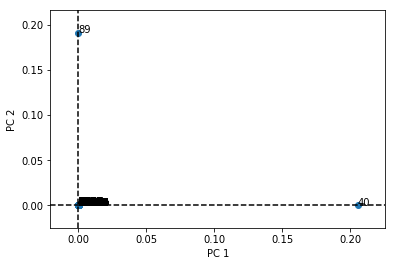

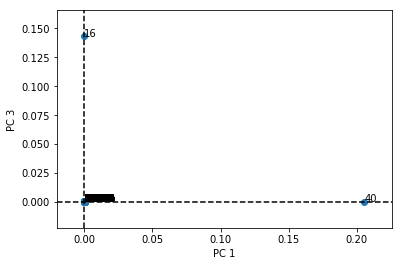

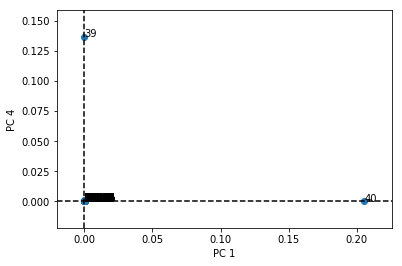

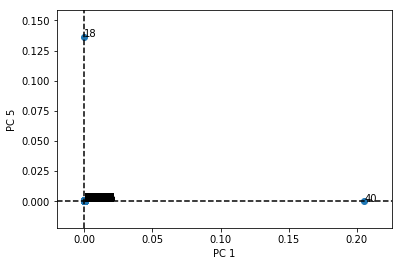

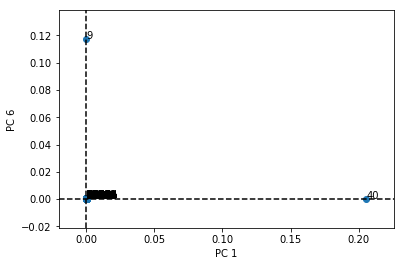

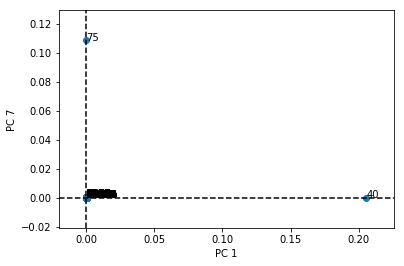

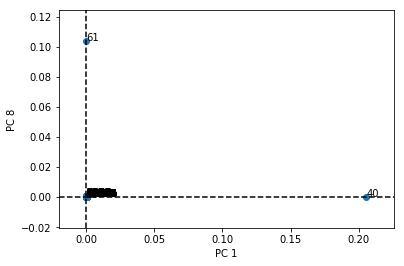

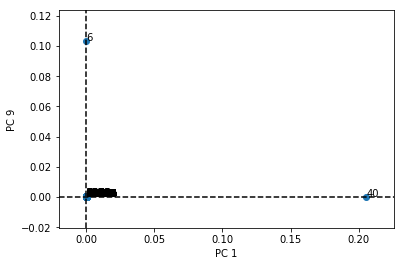

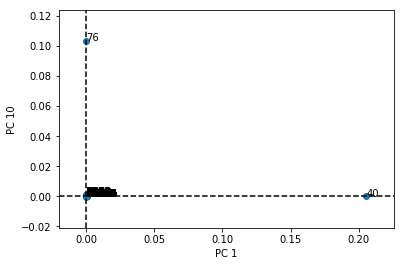

In [108]:
# Create loading:
loadings = eig_vector.T * np.sqrt(svd.explained_variance_)

loading_df = pd.DataFrame(loadings)

features = list(df.columns)

for l in range(1, 10):
    
    fig, ax = plt.subplots()
    ax.scatter(loading_df[0], loading_df[l])

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC {}'.format((l+1)))
    ax.axvline(0, color='k', linestyle='--')
    ax.axhline(0, color='k', linestyle='--')

    for i, f in zip(range(12401), features):
        ax.annotate(f, (loading_df[0].iloc[i],loading_df[l].iloc[i]))

    plt.show()

In [109]:
svd = TruncatedSVD(n_components=101, random_state=42)
svd.fit(tf)

# Eigen vector:
eig_vector = svd.components_
#print(eig_vector)

# Eigen values:
eig_val = svd.explained_variance_

# Eigen vlues 2-101:
print("Eigen Values: {}".format(eig_val[1:]))

Eigen Values: [ 0.03659951  0.02054944  0.01870819  0.01861608  0.01377556  0.01184972
  0.0107922   0.01068688  0.01066792  0.01059612  0.01055788  0.00879037
  0.00821484  0.00741707  0.00680504  0.00646458  0.00640108  0.00633356
  0.00633864  0.00617352  0.00610018  0.00603165  0.00596872  0.00537066
  0.005346    0.00492628  0.00490669  0.00486381  0.00466052  0.00453741
  0.00450091  0.00431621  0.00406935  0.00405582  0.00401466  0.0039926
  0.00385479  0.00377772  0.00339501  0.00337957  0.00335818  0.00331488
  0.00323696  0.00309077  0.00304675  0.00299121  0.00298515  0.00292059
  0.00284465  0.00279137  0.0026563   0.00265236  0.00262964  0.00249932
  0.00248128  0.00248094  0.00243621  0.00237613  0.0022827   0.00226544
  0.00222776  0.00222634  0.00221659  0.0021826   0.00215206  0.00211071
  0.00209129  0.00208529  0.00206734  0.00200088  0.00195861  0.00194314
  0.00190656  0.00185696  0.0018532   0.00182912  0.00182584  0.00182306
  0.00181033  0.00179576  0.00172328  

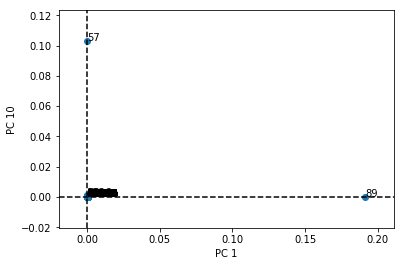

In [110]:
# Create loading for eigen vectors from 2 to 101:
loadings = eig_vector[1:].T * np.sqrt(eig_val[1:])
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = list(df.columns)

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[9])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 10')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(12401), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[9].iloc[i]))

plt.show()

# Q3

I commented the document to prove that I have completed the task.

In [1]:
import pandas as pd

# Read in data, directly from the website:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] # Set column names
df.dropna(how="all", inplace=True) # drops the empty line at file-end

# Check the last few rows:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values # Use only the first 4 columns as the Xs. 
y = df.ix[:,4].values # Use the fifth column in df as the target y. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


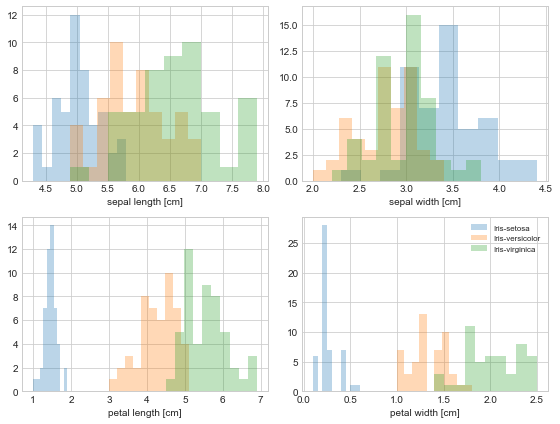

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

# Create labels:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

# Plot:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    # Plot multiple graphs in one figure:
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        # Labeling:
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt]) # Set x label;
    plt.legend(loc='upper right', fancybox=True, fontsize=8) # Set legend

    plt.tight_layout() # Fix the graph gaps.
    plt.show()

In [4]:
# Standardize the X, with sklearn standardScaler.

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [5]:
# Manually calculate the covariance matrix:

import numpy as np
mean_vec = np.mean(X_std, axis=0) # Record means;

# Calculate the covariance matrix manualy:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [6]:
# Compare the Numpy built-in method for covariance and the manual one above:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
""" This is the correct way/SKLearn way to calculate eigenvalues. 

"""

cov_mat = np.cov(X_std.T) # Use numpy built-in covariance calculation for the covariance matrix. 

# Calculate the eigenvalues based on covariance matrix.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [8]:
""" Using correlation coefficients to calculate eigenvalues.

Noted that the author used the X_std here.

"""

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [9]:
""" Using correlation coefficients to calculate eigenvalues.

Noted that the author do the X here,
to compare with the above, 
and to show that the process of calculating eigenvalues have automatically standardized data.

"""

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [10]:
# Vector U:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:\n', u)

Vectors U:
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [11]:
# To verify that the eigenvectors computed by numpy are normed to length 1
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


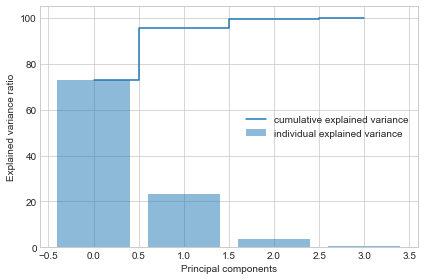

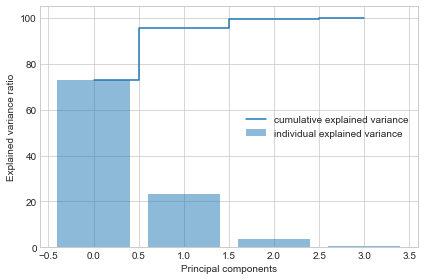

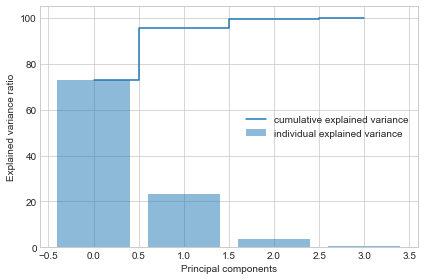

In [15]:
tot = sum(eig_vals) # This should eaque to the number of features.

# Variance covered for each eigen value, sorted from the most to the least.
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp) # Calculate the cumulative ones. 

# Use seaborn to plot:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    #plt.savefig('/Users/Sebastian/Desktop/pca2.pdf')

In [16]:
"""
From the above, we can see the first two PC can cover more than 90% of the variance, 
therefore, look into the first two PCs eigen vectors. 

"""
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


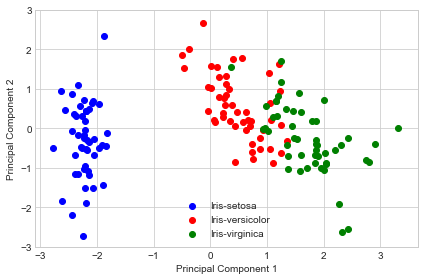

In [17]:
# Create Y as standardized X (4x4) dot W (4x2), to set the standardized original features into the PC directions. 
Y = X_std.dot(matrix_w)

# Plot with seaborn:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.show()
    
""" Actually in this plot, the data is better explained by PC1 than PC2.

"""

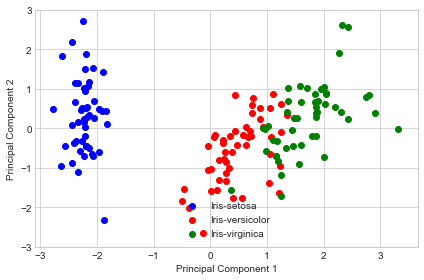

In [18]:
""" Use Sklearn built-in PCA:

"""

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [19]:
""" Find the eigenvalues:

"""
eigenvalue=sklearn_pca.explained_variance_
print("Eigenvalue: {}".format(eigenvalue))

Eigenvalue: [ 2.93035378  0.92740362  0.14834223  0.02074601]


In [21]:
""" Find the eigen vectors:

"""
eigenvector=sklearn_pca.components_ 
print("Eigenvector: \n{}".format(eigenvector))

Eigenvector: 
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


# Q4: Face Recognition Exercise

I commented the document to prove that I have completed the task.

2018-04-27 16:18:51,575 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2018-04-27 16:18:54,202 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2018-04-27 16:18:55,453 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2018-04-27 16:18:56,974 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.315s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.030s
Fitting the classifier to the training set
done in 35.069s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.076s
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.77      0.62        13
     Colin Powell       0.76      0.87      0.81        60
  Donald Rumsfeld       0.75      0.78      0.76        27
    George W Bush       0.92      0.88      0.90       146
Gerhard Schroeder       0.77      0.80      0.78        25
      Hugo Chavez       0.80      0.53      0.64    

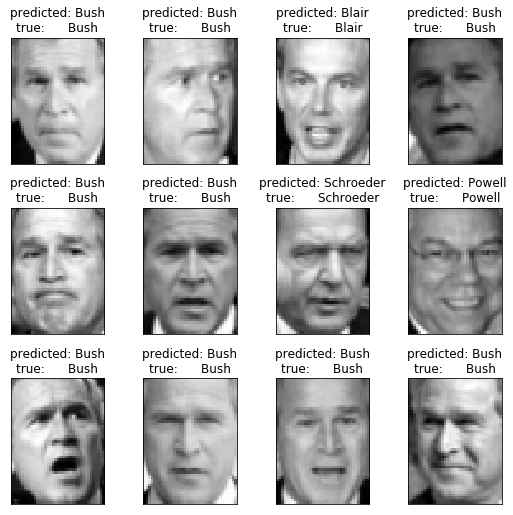

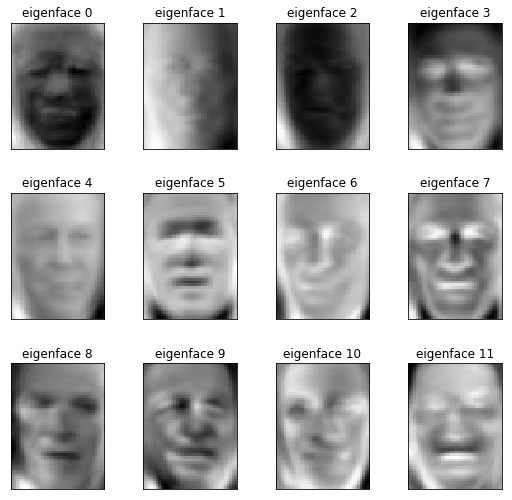

In [1]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

# The extracted dataset will only retain pictures of people that have at least 70 different pictures:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
# Each row is a face image corresponding to one of the 5749 people in the dataset. 
# But in this case, only 1288 people are considered since the above restriction.
n_samples, h, w = lfw_people.images.shape # h and w denote the pixels: in this case they are set as 50*37

# for machine learning we use the 2 data directly (as relative pixel positions info is ignored by this model)
# lfw_people.data has 1288, with 50*37 features. 
X = lfw_people.data
n_features = X.shape[1] # =50*37

# the label to predict is the id of the person
y = lfw_people.target

# Extract people's names based on ID.
target_names = lfw_people.target_names 
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42) # Using 25% of the dataset as the training data


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time() # Record the time
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

# Use pca.components_ to obtain the eigen vectors, and reshape it into (150, 50, 37)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Fit pca with X_train and X_test
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()

# Creat grid for Grid Search:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

# Use the result from the GridSearch to perform the final SVM:
clf = clf.fit(X_train_pca, y_train) # Train on the PCA results from X_train. 
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca) # Use PCA results from X_test
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [8]:
print(pca.components_.shape)
print((pca.components_.reshape((n_components, h, w))).shape)

(150, 1850)
(150, 50, 37)


In [2]:
print(h, w)

50 37


# Q5 Boston House Problem

In [15]:
""" Read in and set data and target:

"""

from sklearn.datasets import load_boston

X = load_boston().data
y = load_boston().target
#print(y.shape)

(506,)


In [22]:
""" Write into DataFrame and Standardize:

"""
import pandas as pd
import numpy as np

X_df = pd.DataFrame(X)
#X_df.head()

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_df)

X_std_df = pd.DataFrame(X_std)
X_std_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [24]:
""" Generate Variance:

"""

cov_mat = np.cov(X_std.T)

print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.0019802  -0.19985293  0.40527163 -0.05540475  0.41834821 -0.22037532
   0.35147829 -0.37865193  0.62326065  0.58071193  0.28882095 -0.37811187
   0.45311576]
 [-0.19985293  1.0019802  -0.53488527 -0.04278127 -0.51762669  0.31260839
  -0.57066514  0.66572388 -0.31256554 -0.31518622 -0.39245415  0.17586788
  -0.41381239]
 [ 0.40527163 -0.53488527  1.0019802   0.06306266  0.76516363 -0.39245145
   0.6460553  -0.70942902  0.59630775  0.72218743  0.38400646 -0.35768342
   0.60499536]
 [-0.05540475 -0.04278127  0.06306266  1.0019802   0.09138341  0.09143192
   0.0866891  -0.09937217 -0.00738283 -0.03565699 -0.1217558   0.0488851
  -0.05403609]
 [ 0.41834821 -0.51762669  0.76516363  0.09138341  1.0019802  -0.30278658
   0.73291856 -0.77075334  0.61265134  0.66934602  0.1893068  -0.38080321
   0.59204898]
 [-0.22037532  0.31260839 -0.39245145  0.09143192 -0.30278658  1.0019802
  -0.2407407   0.20565264 -0.21026221 -0.29262615 -0.35620546  0.12832224
  -0.61502373

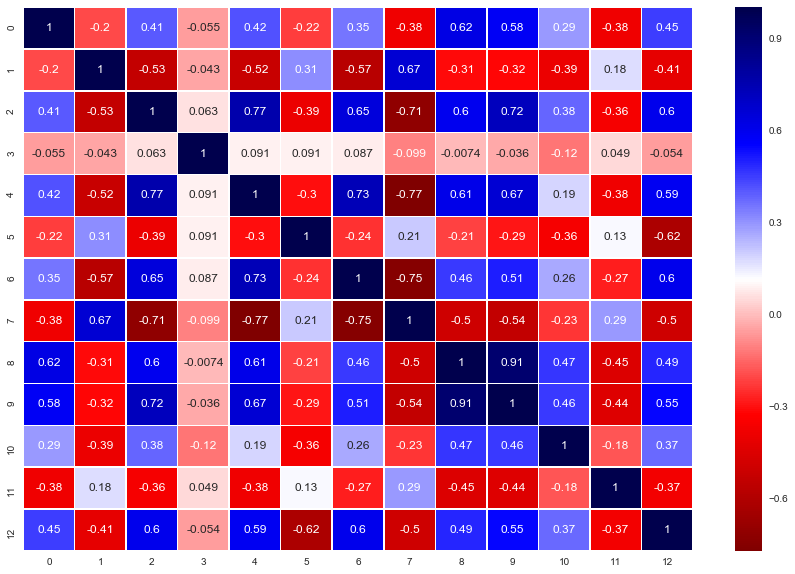

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cov = pd.DataFrame(cov_mat)
df_cov.head()

sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_cov, annot=True, cmap='seismic_r', linewidths=.5)
#pylab.savefig('correlations', dpi = 80, figsize = (20,6))
plt.show()

#df_cov.to_csv('Covariance_Matrix.csv', encoding='utf-8')

In [31]:
# Calculate the eigenvalues based on covariance matrix.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.24959319  0.31318631 -0.24705298 -0.06642483  0.07998801  0.24796042
  -0.77360385 -0.14534989 -0.04552843 -0.25537919  0.0881295   0.10648068
  -0.01737437]
 [ 0.25652131  0.32130825 -0.29855754 -0.12862481  0.32209839  0.31167125
   0.28754911  0.39962744  0.08089873 -0.36040796 -0.07174148 -0.26369745
  -0.26623725]
 [-0.3468611  -0.11181554  0.01603913 -0.01662713 -0.00718772  0.06766408
   0.33659989 -0.18025919  0.25126664 -0.64506207 -0.11214823  0.30254753
   0.36452128]
 [-0.005099   -0.45672596 -0.28650541 -0.81597435  0.0846926  -0.16757206
  -0.07644435  0.02536901 -0.03590431  0.01400246 -0.00398223 -0.01397425
   0.0062468 ]
 [-0.34297566 -0.21985693 -0.11957325  0.12812676  0.13758882  0.14719367
   0.2033449  -0.08190253 -0.04389033  0.01858176  0.80376045 -0.11261555
  -0.23168469]
 [ 0.18943673 -0.15387677 -0.59290212  0.28180778 -0.42244528 -0.05763299
  -0.06277721  0.32715469 -0.04580522 -0.04786565  0.15336561 -0.05208914
   0.43140567]
 [-0.313

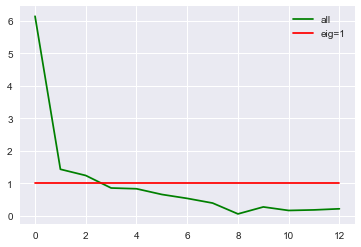

In [37]:
""" Create Scree plot using Eigenvalues:

"""

arr = np.array([1]*13) # For creating Kaiser's criterion

plt.plot(eig_vals, color='green', label='all')
plt.plot(arr, color='r', label='eig=1')
plt.legend(loc='upper right')
plt.show()

### Technique #1 and #2:

- #1: 3 Principle Components
- #2: 4 Principle Components

In [39]:
from sklearn.decomposition import PCA as sklearnPCA

# Initialize:
pca_tech_1 = sklearnPCA(n_components=3)
pca_tech_2 = sklearnPCA(n_components=4)

# Fit the standardized X:
Y_tech_1 = pca_tech_1.fit(X_std)
Y_tech_2 = pca_tech_2.fit(X_std)

#The amount of variance that each PC explains
var_tech_1= pca_tech_1.explained_variance_ratio_
var_tech_2= pca_tech_2.explained_variance_ratio_

# Cumulative Variance explains
cum_tech_1=np.cumsum(np.round(pca_tech_1.explained_variance_ratio_, decimals=4)*100)
cum_tech_2=np.cumsum(np.round(pca_tech_2.explained_variance_ratio_, decimals=4)*100)

print("Tech 1: ***************************")
print("Variance Coverage: \n{}\n".format(cum_tech_1))

print("Tech 1: ***************************")
print("Variance Coverage: \n{}\n".format(cum_tech_2))

Tech 1: ***************************
Variance Coverage: 
[ 47.1   58.12  67.67]

Tech 1: ***************************
Variance Coverage: 
[ 47.1   58.12  67.67  74.27]



### Explaining the chosen components:

I preferred to use 4 components, since it yeilds more coverage on the variances. 

In [ ]:
# Eigen vector:
eig_vector = pca_tech_2.components_
#print(eig_vector)

# Create loading:
loadings = eig_vector.T * np.sqrt(pca_tech_2.explained_variance_)
print(loadings)

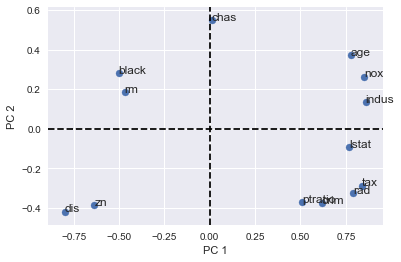

In [68]:
# Write loadings out for analysis
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[1])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[1].iloc[i]))

plt.show()

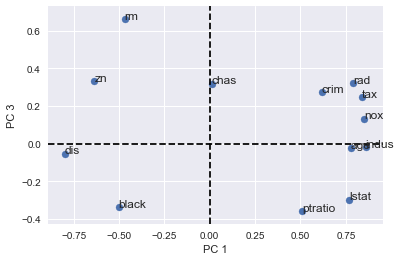

In [69]:
fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[2])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 3')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[2].iloc[i]))

plt.show()

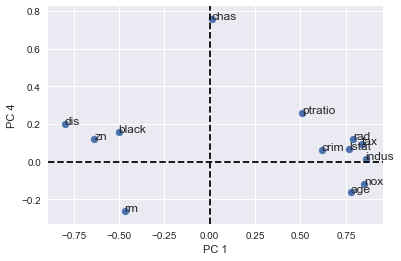

In [70]:
fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[3])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[3].iloc[i]))

plt.show()

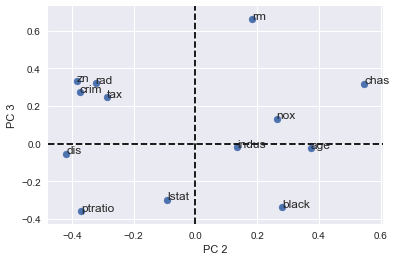

In [71]:
fig, ax = plt.subplots()
ax.scatter(loading_df[1], loading_df[2])

ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(13), features):    
    ax.annotate(f, (loading_df[1].iloc[i],loading_df[2].iloc[i]))

plt.show()

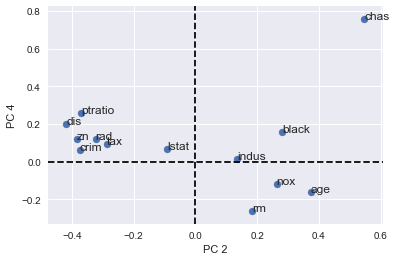

In [72]:
fig, ax = plt.subplots()
ax.scatter(loading_df[1], loading_df[3])

ax.set_xlabel('PC 2')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[1].iloc[i],loading_df[3].iloc[i]))

plt.show()

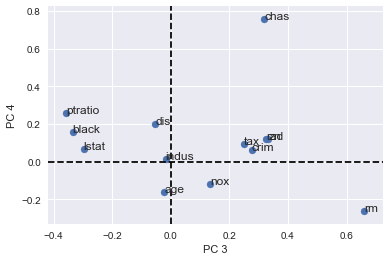

In [73]:
fig, ax = plt.subplots()
ax.scatter(loading_df[2], loading_df[3])

ax.set_xlabel('PC 3')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[2].iloc[i],loading_df[3].iloc[i]))

plt.show()

# Q6 Extra Credits: dataset of my own and PCA

In [75]:
""" Read in data:

The data have already been standardized.

"""
df = pd.read_csv('Cleaned_Bank_HW5.csv')
df.head()

,education,day_of_week,month,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,...,campaign,pdays,previous,duration,cons.conf.idx,cons.price.idx,emp.var.rate,euribor3m,nr.employed,y
0,1.057731,-1.405932,2.012015,-0.363194,-1.160152,1.492861,-0.919461,0.919461,0.430559,-0.430559,...,-0.559335,0.211887,-0.371616,1.725253,-0.291854,-0.552325,-0.017691,0.411356,0.465514,0
1,1.057731,0.015149,2.012015,-0.363194,-1.160152,1.492861,-0.919461,0.919461,0.430559,-0.430559,...,-0.559335,0.211887,-0.371616,-0.758412,-0.291854,-0.552325,-0.017691,0.371405,0.465514,0
2,-0.874489,-0.695392,-0.798694,-0.363194,-1.160152,1.492861,1.087593,-1.087593,0.430559,-0.430559,...,-0.559335,0.211887,-0.371616,-0.143228,0.877451,0.804095,0.727477,0.786102,0.401648,0
3,-0.874489,0.015149,-1.267145,2.753347,-1.160152,-0.669855,-0.919461,0.919461,0.430559,-0.430559,...,-0.191702,0.211887,1.541237,0.319116,-1.356756,-0.765867,-1.073347,-1.150650,-0.821128,0
4,-0.874489,1.436229,-0.798694,-0.363194,0.861956,-0.669855,-0.919461,0.919461,0.430559,-0.430559,...,-0.191702,0.211887,-0.371616,-0.372489,0.877451,0.804095,0.727477,0.784977,0.401648,0


************Eigenvalues:
[ 1.40813247  1.16803565  1.13204545  1.01589473  0.98857466  0.8706778
  0.75830351  0.65859814]

************Cumulative variance coverage:
[  17.6    32.2    46.35   59.05   71.41   82.29   91.77  100.  ]


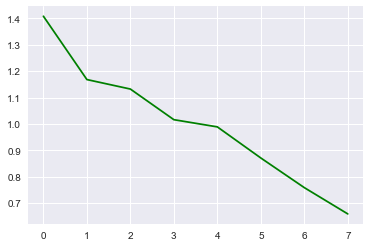

In [76]:
num_col = ['education', 'day_of_week', 'month', 'age', 'campaign',
       'duration', 'cons.conf.idx', 'cons.price.idx']

X_num = df[num_col]

from sklearn.decomposition import PCA

n = len(num_col)
pca = PCA(n_components=n)


pca.fit(X_num)

# Eigenvalues:
eigen_val=pca.explained_variance_

# Cumulative Variance explains
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print("************Eigenvalues:\n{}\n".format(eigen_val))

print("************Cumulative variance coverage:\n{}".format(var_cum))

plt.plot(eigen_val, color='green', label='all')
#plt.plot(var1_num_sam, color='blue', label='sampled')
#plt.legend(loc='lower right')
plt.show()


In [ ]:
""" According to Kaiser's criterion, I chose 4 components. 

This will give me 60% variance coverage, however, considering this is from a human-behavior related dataset,
this is acceptable.

"""

In [77]:
# New PCA with n = 4:
pca = PCA(n_components=4)
pca.fit(X_num)

# Eigen vector:
eig_vector = pca.components_
#print(eig_vector)

# Create loading:
loadings = eig_vector.T * np.sqrt(pca.explained_variance_)
print(loadings)

[[ 0.27311365 -0.72640629  0.19998684  0.04603025]
 [-0.028436   -0.11640243  0.10180331  0.61075517]
 [ 0.7779333  -0.04799981  0.08696702  0.01625082]
 [ 0.31297885  0.72261063 -0.09197265 -0.06834411]
 [-0.18263708  0.09470608  0.71762328 -0.05154023]
 [-0.03846083  0.07792154 -0.37424804  0.7136974 ]
 [ 0.69722542  0.15655253  0.30405528  0.18637476]
 [-0.32960278  0.25059974  0.56406578  0.29843447]]


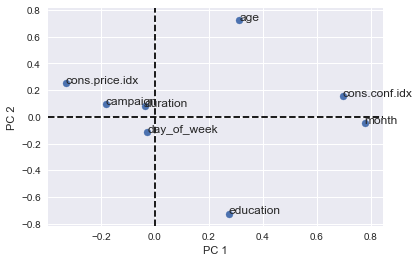

In [78]:
# Write loadings out for analysis
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = num_col

fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[1])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[1].iloc[i]))

plt.show()

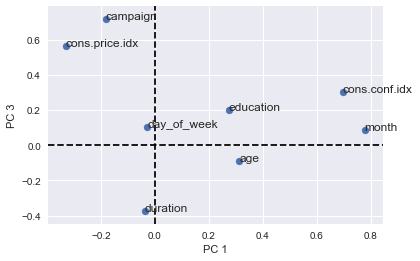

In [79]:
fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[2])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 3')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[2].iloc[i]))

plt.show()

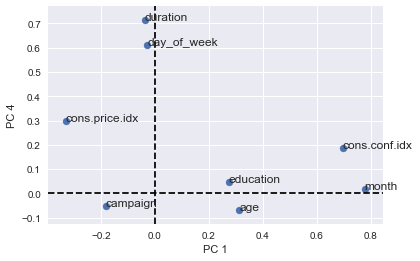

In [80]:
fig, ax = plt.subplots()
ax.scatter(loading_df[0], loading_df[3])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[3].iloc[i]))

plt.show()

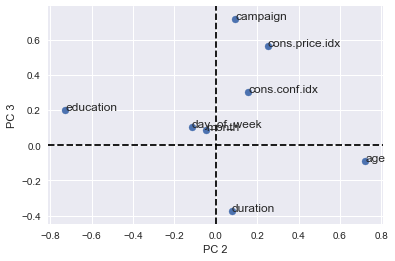

In [81]:
fig, ax = plt.subplots()
ax.scatter(loading_df[1], loading_df[2])

ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(13), features):    
    ax.annotate(f, (loading_df[1].iloc[i],loading_df[2].iloc[i]))

plt.show()

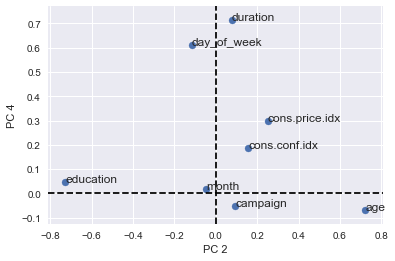

In [82]:
fig, ax = plt.subplots()
ax.scatter(loading_df[1], loading_df[3])

ax.set_xlabel('PC 2')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[1].iloc[i],loading_df[3].iloc[i]))

plt.show()

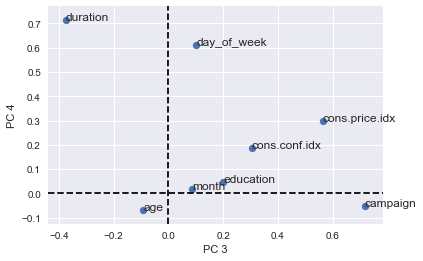

In [83]:
fig, ax = plt.subplots()
ax.scatter(loading_df[2], loading_df[3])

ax.set_xlabel('PC 3')
ax.set_ylabel('PC 4')

ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')


for i, f in zip(range(13), features):
    ax.annotate(f, (loading_df[2].iloc[i],loading_df[3].iloc[i]))

plt.show()

# Q7: K-means for LSA

### With LSA, and compare LSA and KMeans

In [147]:
from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.


In [148]:
# Set opts:

use_hashing = opts.use_hashing

use_idf = opts.use_idf

n_components = opts.n_components

minibatch = opts.minibatch

n_features = opts.n_features

verbose = opts.verbose

use_hashing = True
use_idf = True 
n_components = 100
minibatch = True
n_features = 10000
verbose = False

### With LSA:

In [151]:
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer
done in 2.422944s
n_samples: 3387, n_features: 10000

Performing dimensionality reduction using LSA
done in 2.625482s
Explained variance of the SVD step: 24%

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 0.090s

Homogeneity: 0.581
Completeness: 0.580
V-measure: 0.581
Adjusted Rand-Index: 0.592
Silhouette Coefficient: 0.039

Top terms per cluster:
Cluster 0: 00 000 06 02 040 04 103 03 136 105
Cluster 1: 00 01 02 102 10 04 01wb 112 07 114
Cluster 2: 00 000 08 01wb 01 07 05 123 104 106
Cluster 3: 00 01wb 03 00000 12653 11632 114 147 0500 100


### Without LSA, and perform the K-means directly.

In [152]:
""" Switch off the LSA:

"""
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer
done in 2.391359s
n_samples: 3387, n_features: 10000

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 0.292s

Homogeneity: 0.546
Completeness: 0.631
V-measure: 0.585
Adjusted Rand-Index: 0.526
Silhouette Coefficient: 0.008

Top terms per cluster:
Cluster 0: access digex pat prb net hst express com online communications
Cluster 1: space nasa henry gov toronto alaska moon shuttle launch orbit
Cluster 2: god com people sandvik article don jesus say keith think
Cluster 3: graphics university com thanks image posting host nntp files 3d


# Q8 IRIS K-means

### Scree plots

In [159]:
# Load in dataset:

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target


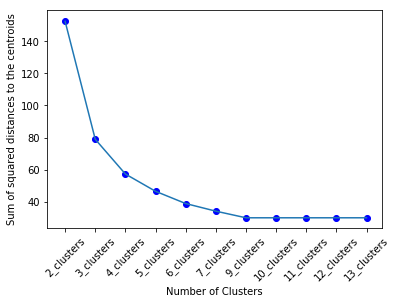

In [171]:
# Generate models and the xtickes labels.
estimators = [('13_clusters', KMeans(n_clusters=8, random_state=0)),
              ('12_clusters', KMeans(n_clusters=8, random_state=0)),
              ('11_clusters', KMeans(n_clusters=8, random_state=0)),
              ('10_clusters', KMeans(n_clusters=8, random_state=0)),
              ('9_clusters', KMeans(n_clusters=8, random_state=0)), 
              ('7_clusters', KMeans(n_clusters=7, random_state=0)),
              ('6_clusters', KMeans(n_clusters=6, random_state=0)), 
              ('5_clusters', KMeans(n_clusters=5, random_state=0)),
              ('4_clusters', KMeans(n_clusters=4, random_state=0)), 
              ('3_clusters', KMeans(n_clusters=3, random_state=0)),
              ('2_clusters', KMeans(n_clusters=2, random_state=0))]


to_centroid = []
xs = []
xlabel = []
i = 13
for name, est in estimators:
    est.fit(X) # Fit the model
    
    # The sum of squares of the distances for the samples to the closest centroids
    dist_centroid = est.inertia_ 
    
    xlabel.append(name)
    xs.append(i)
    to_centroid.append(dist_centroid)
    
    plt.scatter(i, dist_centroid, color='b')
    i -= 1
      
plt.xticks(xs, xlabel, rotation=45)
plt.plot(xs, to_centroid)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances to the centroids')

plt.show() 



### 10-cross Validation

In [169]:
# Generate models.
clusters = [KMeans(n_clusters=13, random_state=0), KMeans(n_clusters=12, random_state=0),
            KMeans(n_clusters=11, random_state=0), KMeans(n_clusters=10, random_state=0),
            KMeans(n_clusters=8, random_state=0), KMeans(n_clusters=7, random_state=0), 
            KMeans(n_clusters=6, random_state=0), KMeans(n_clusters=5, random_state=0),
            KMeans(n_clusters=4, random_state=0), KMeans(n_clusters=3, random_state=0), 
            KMeans(n_clusters=2)]

In [170]:
# Inditiate KFold.
kf = KFold(n_splits=10)

# Split data into 10 folds.
s = kf.split(X)

i = 13
for cluster in clusters:
    # Initiate regression.
    kmeans = cluster
    
    SSEs = []
    # Cross-validation.
    for train_index, test_index in kf.split(X):
        # Split up 10-folds, labeled train, but in reality just the fitting data. 
        X_train, X_test = X[train_index], X[test_index]
        
        # fit the model:
        kmeans.fit(X_train)
        
        # Validation with-in cluster sum of squared error:
        est = kmeans.predict(X_test)
        SSE = kmeans.inertia_
        SSEs.append(SSE)
        
    print("**********************{} Clusters*******************************".format(i))    
    print("10-fold CV mean with-in cluster sum of squared error: {}".format(np.round(np.mean(SSEs), 4)))
    print()
    
    i -= 1

**********************13 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 18.9044

**********************12 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 20.2857

**********************11 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 21.4274

**********************10 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 23.0762

**********************9 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 26.8217

**********************8 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 30.5595

**********************7 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 34.8079

**********************6 Clusters*******************************
10-fold CV mean with-in cluster sum of squa

# Q9: US Census

In [172]:
# Read in:
census = pd.read_csv('USCensus1990.data.txt')
census.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [173]:
# Drop caseid:
census.drop(['caseid'], axis=1, inplace=True)
census.head()

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,5,0,1,0,0,5,3,2,2,1,...,0,5,0,2,1,1,0,11,1,0
1,6,1,1,0,0,7,5,2,2,0,...,0,1,0,2,1,1,0,5,1,0
2,3,1,2,0,0,7,4,2,2,0,...,0,2,0,2,1,1,0,10,1,0
3,4,1,2,0,0,1,3,2,2,0,...,0,1,0,1,1,1,0,10,1,0
4,7,1,1,0,0,0,0,2,2,0,...,3,0,0,0,2,2,0,5,6,0


In [208]:
census.columns

Index(['dAge', 'dAncstry1', 'dAncstry2', 'iAvail', 'iCitizen', 'iClass',
       'dDepart', 'iDisabl1', 'iDisabl2', 'iEnglish', 'iFeb55', 'iFertil',
       'dHispanic', 'dHour89', 'dHours', 'iImmigr', 'dIncome1', 'dIncome2',
       'dIncome3', 'dIncome4', 'dIncome5', 'dIncome6', 'dIncome7', 'dIncome8',
       'dIndustry', 'iKorean', 'iLang1', 'iLooking', 'iMarital', 'iMay75880',
       'iMeans', 'iMilitary', 'iMobility', 'iMobillim', 'dOccup', 'iOthrserv',
       'iPerscare', 'dPOB', 'dPoverty', 'dPwgt1', 'iRagechld', 'dRearning',
       'iRelat1', 'iRelat2', 'iRemplpar', 'iRiders', 'iRlabor', 'iRownchld',
       'dRpincome', 'iRPOB', 'iRrelchld', 'iRspouse', 'iRvetserv', 'iSchool',
       'iSept80', 'iSex', 'iSubfam1', 'iSubfam2', 'iTmpabsnt', 'dTravtime',
       'iVietnam', 'dWeek89', 'iWork89', 'iWorklwk', 'iWWII', 'iYearsch',
       'iYearwrk', 'dYrsserv'],
      dtype='object')

In [214]:
np.unique(census['dPoverty'].values)

array([0, 1, 2], dtype=int64)

In [175]:
data = census.copy()
data.head()

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,5,0,1,0,0,5,3,2,2,1,...,0,5,0,2,1,1,0,11,1,0
1,6,1,1,0,0,7,5,2,2,0,...,0,1,0,2,1,1,0,5,1,0
2,3,1,2,0,0,7,4,2,2,0,...,0,2,0,2,1,1,0,10,1,0
3,4,1,2,0,0,1,3,2,2,0,...,0,1,0,1,1,1,0,10,1,0
4,7,1,1,0,0,0,0,2,2,0,...,3,0,0,0,2,2,0,5,6,0


In [176]:
X = data

In [178]:
print(X.shape)

(2458285, 68)


In [177]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [179]:
from sklearn.decomposition import PCA

pca_all = PCA(n_components=67)
pca_all.fit(X_std)

# eigenvalues and vairaince ratio:
eigen_all=pca_all.explained_variance_
var_all= pca_all.explained_variance_ratio_

var1_all=np.cumsum(np.round(pca_all.explained_variance_ratio_, decimals=4)*100)

print("************Eigenvalues:\n All data:{}\n".format(eigen_all))
print()

print("************Cumulative Percentage:\n All data:{}\n".format(var1_all))
print()



************Eigenvalues:
 All data:[  1.51264713e+01   8.54681044e+00   4.39450793e+00   3.71435925e+00
   2.44781534e+00   2.05357890e+00   1.66607035e+00   1.52591562e+00
   1.47837360e+00   1.39126396e+00   1.24484310e+00   1.18247746e+00
   1.09430468e+00   1.06195437e+00   1.03003344e+00   1.00826948e+00
   9.93131757e-01   9.88340722e-01   9.63419589e-01   9.47267817e-01
   9.28172824e-01   9.11101046e-01   8.70732073e-01   8.38508326e-01
   8.26189202e-01   7.90727367e-01   7.67555448e-01   6.77407099e-01
   6.60108753e-01   6.48600068e-01   6.01393734e-01   5.74529557e-01
   5.29937034e-01   4.83044752e-01   4.34983438e-01   3.92923796e-01
   3.48942507e-01   3.34589033e-01   2.94786595e-01   2.80151453e-01
   2.65593764e-01   2.57397165e-01   2.46862457e-01   2.32869437e-01
   2.10107517e-01   2.04569785e-01   1.74025456e-01   1.63150689e-01
   1.36060674e-01   1.31953899e-01   1.13307395e-01   1.06224578e-01
   1.00436641e-01   9.12019925e-02   7.02069434e-02   5.52113022e-02

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


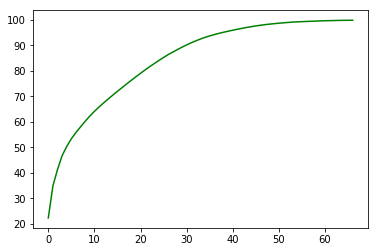

In [180]:
plt.plot(var1_all, color='green')
plt.legend(loc='lower right')

plt.show()


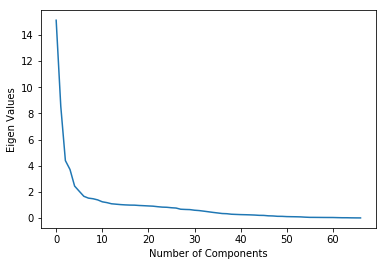

In [182]:
plt.plot(eigen_all)
plt.xlabel('Number of Components')
plt.ylabel('Eigen Values')
plt.show()

In [183]:
""" Choose 10 components:

"""

pca_all = PCA(n_components=10)
X_pca = pca_all.fit_transform(X_std)

In [238]:
""" Done in Spyder

"""

# Generate models and the xtickes labels.
estimators = [('8_clusters', KMeans(n_clusters=8)), ('7_clusters', KMeans(n_clusters=7)),
              ('6_clusters', KMeans(n_clusters=6)), ('5_clusters', KMeans(n_clusters=5)),
              ('4_clusters', KMeans(n_clusters=4)), ('3_clusters', KMeans(n_clusters=3)),
              ('2_clusters', KMeans(n_clusters=2))]


to_centroid = []
xs = []
xlabel = []
i = 8
for name, est in estimators:
    est.fit(X_pca) # Fit the model
    
    # The sum of squares of the distances for the samples to the closest centroids
    dist_centroid = est.inertia_ 
    
    xlabel.append(name)
    xs.append(i)
    to_centroid.append(dist_centroid)
    
    plt.scatter(i, dist_centroid, color='b')
    i -= 1
      
plt.xticks(xs, xlabel, rotation=45)
plt.plot(xs, to_centroid)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances to the centroids')

plt.show() 


KeyboardInterrupt: 

### 10-fold Cross Validation
Done in Spyder

In [ ]:
# Generate models.
clusters = [KMeans(n_clusters=9), KMeans(n_clusters=7), KMeans(n_clusters=5),
            KMeans(n_clusters=3), KMeans(n_clusters=2)]

# Inditiate KFold.
kf = KFold(n_splits=10)

# Split data into 10 folds.
s = kf.split(X_pca)

lst = [9, 7, 5, 3, 2]
i = 0
for cluster in clusters:
    # Initiate regression.
    kmeans = cluster
    
    SSEs = []
    # Cross-validation.
    for train_index, test_index in kf.split(X_pca):
        # Split up 10-folds, labeled train, but in reality just the fitting data. 
        X_train, X_test = X_pca.iloc[train_index], X_pca.iloc[test_index]
        # fit the model:
        kmeans.fit(X_train)
        
        # Validation with-in cluster sum of squared error:
        est = kmeans.predict(X_test)
        SSE = kmeans.inertia_
        SSEs.append(SSE)
        
    print("**********************{} Clusters*******************************".format(lst[i]))    
    print("10-fold CV mean with-in cluster sum of squared error: {}".format(np.round(np.mean(SSEs), 4)))
    print()
    
    i += 1

# Q10. Extra Credits. Twitter data with K-means

Elon Musk Twitter from 2012 to 2017.

In [97]:
""" Read in Data:

"""
musk = pd.read_csv('data_elonmusk.csv', encoding='latin1')
musk.head()

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [118]:
""" Create tweets list so that I can write into TfidfVectorizer:

Create stopwords list;
Extract the words by hand, and avoid the stopwords.

"""

from nltk.corpus import stopwords
from string import punctuation

stoplist = stopwords.words('english') + list(punctuation) + ['rt']

tweet=[]

for i in range(len(musk['Tweet'])):
        temp=musk['Tweet'][i]
        tweet.append(temp)
        
print(tweet[0])


@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC


In [140]:
tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                ngram_range = (1,3))
t0 = time()
tf = tf_vectorizer.fit_transform(tweet)

EM = pd.DataFrame(tf.toarray())
EM.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
3213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Method one: 10-fold cross validation on the within-cluster sum of squared error

In [147]:
# Generate models.
clusters = [KMeans(n_clusters=30), KMeans(n_clusters=25), 
            KMeans(n_clusters=20), KMeans(n_clusters=15),
            KMeans(n_clusters=10), KMeans(n_clusters=5)]

# Inditiate KFold.
kf = KFold(n_splits=10)

# Split data into 10 folds.
s = kf.split(EM)

lst = [30, 25, 20, 15, 10, 5]
i = 0
for cluster in clusters:
    # Initiate regression.
    kmeans = cluster
    
    SSEs = []
    # Cross-validation.
    for train_index, test_index in kf.split(EM):
        # Split up 10-folds, labeled train, but in reality just the fitting data. 
        X_train, X_test = EM.iloc[train_index], EM.iloc[test_index]
        # fit the model:
        kmeans.fit(X_train)
        
        # Validation with-in cluster sum of squared error:
        est = kmeans.predict(X_test)
        SSE = kmeans.inertia_
        SSEs.append(SSE)
        
    print("**********************{} Clusters*******************************".format(lst[i]))    
    print("10-fold CV mean with-in cluster sum of squared error: {}".format(np.round(np.mean(SSEs), 4)))
    print()
    
    i += 1

**********************30 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2396.528

**********************25 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2420.1624

**********************20 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2452.0332

**********************15 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2487.6491

**********************10 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2536.081

**********************35 Clusters*******************************
10-fold CV mean with-in cluster sum of squared error: 2596.1385



### Method Two: Scree plot

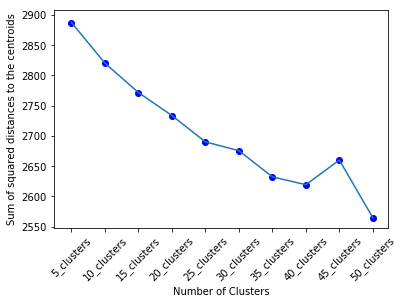

In [158]:
# Generate models and the xtickes labels.
estimators = [('50_clusters', KMeans(n_clusters=50, random_state=0)), 
              ('45_clusters', KMeans(n_clusters=45, random_state=0)),
              ('40_clusters', KMeans(n_clusters=40, random_state=0)), 
              ('35_clusters', KMeans(n_clusters=35, random_state=0)),
              ('30_clusters', KMeans(n_clusters=30, random_state=0)), 
              ('25_clusters', KMeans(n_clusters=25, random_state=0)), 
              ('20_clusters', KMeans(n_clusters=20, random_state=0)), 
              ('15_clusters', KMeans(n_clusters=15, random_state=0)), 
              ('10_clusters', KMeans(n_clusters=10, random_state=0)), 
              ('5_clusters', KMeans(n_clusters=5, random_state=0))]


to_centroid = []
xs = []
xlabel = []
i = 10
for name, est in estimators:
    est.fit(EM) # Fit the model
    
    # The sum of squares of the distances for the samples to the closest centroids
    dist_centroid = est.inertia_ 
    
    xlabel.append(name)
    xs.append(i)
    to_centroid.append(dist_centroid)
    
    plt.scatter(i, dist_centroid, color='b')
    i -= 1
      
plt.xticks(xs, xlabel, rotation=45)
plt.plot(xs, to_centroid)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances to the centroids')

plt.show() 

# Q11: LDA

### Demo:

you can, but need not, skip the NMF part

In [111]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [112]:
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 3.352s.


In [113]:
print(data_samples[0])

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [235]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()


print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf features for LDA...
done in 1.105s.

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 8.190s.

Topics in LDA model:
Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7:

### 5 topics:
Set the n_components in LDA as 5.

In [236]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 7.749s.

Topics in LDA model:
Topic #0: edu com mail send graphics space program ftp available information pub data contact university image list sun research faq computer
Topic #1: just like don know think people good time use way make ve going right government ll new really want say
Topic #2: people god think law does just know time said say don did jesus believe life bible like fact person says
Topic #3: drive disk windows use key card drives version hard thanks file pc scsi using software does 16 controller dos chip
Topic #4: 10 55 11 12 20 15 car 18 period year 13 14 25 19 22 16 new flyers 21 93



### 50 topics:
Set the n_components in LDA as 50.

In [237]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=50, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 13.413s.

Topics in LDA model:
Topic #0: edu pub graphics mail 128 send 3d ray amiga com server ftp data objects imagine file package images cs archive
Topic #1: drivers software probably info tell windows new community hi people commercial library like doubt uses involved think radio stay important
Topic #2: mark games season year mike major play today hit start bought actually single 200 sold department jewish late taken home
Topic #3: power sale asking contact day added free looks car control speed city white include com door shows engine directly 23
Topic #4: 80 application early led reasonable interface course shots version modern 30 running need dot role space live talk value pay
Topic #5: magi term current period try likely members western various future known phone school old work ground unless read sense media
Topic #6: hiv health april aids new disease 1993 research pittsburgh players informati

### Set parameters:
 
 - alpha = 50/T 
 - and beta = W/2000

In [239]:
# Reset the parameters:

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

In [241]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                doc_topic_prior=(50/n_components),
                                topic_word_prior = (n_features/2000),
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 4.502s.

Topics in LDA model:
Topic #0: 10 55 11 space 15 18 20 13 12 19 period 14 93 25 24 16 21 22 23 team
Topic #1: people think new time care like hiv health don know mr government president just aids said american make national children
Topic #2: like just know think don time does way new want good make use need people ve years better really used
Topic #3: edu com disk drive version graphics hard drives mail ftp send card pc file available scsi contact pub controller files
Topic #4: people said didn just know don like went think going time did came got come took home started dead say
Topic #5: just israel like know people way does think good don problem read say use time jews new right want did
Topic #6: don like use time thanks people just new good problem make windows way does need know using year want ve
Topic #7: car like just use don new good time better cars oil know think does engine make wor

# Q12: NYSK dataset 
LDA

In [220]:
!{sys.executable} -m pip install lda

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [234]:
"""
from urllib import request
from bs4 import BeautifulSoup
import re

url = "file:///C:/Users/Jane%20Liu/Documents/GWU%20Spring2018/MachineLearning/HW5/nysk.html"
html = request.urlopen(url).read()
#print(html[:60])

raw_HTML = BeautifulSoup(html, 'xml').get_text(strip=True)

print(raw_HTML[0:3000])

date_time = re.split('</date>', raw_HTML)
print(date_time[0])

print(len(date_time))

print(date_time[273])

days = []
for ele in date_time:
    mySubString=ele[ele.find("<date>")+6:]
    days.append(mySubString)

print(len(days))

day=[]
for i in days:
    d = datetime.strptime(i, '%Y%m%d %H:%M:%S')
    day.append(d)
    
print(type(day))

print(datetime_object.day)

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
print(datetime_object)

print(days[6])

raw = re.split('<text>', raw_HTML)
print(type(raw))

""" CountVectorizer takes in list, therefore I just needed to create a list for the text.

One element in the list should include the text from one document. 

"""

import re

raw = re.split('<text>', raw_HTML)

data_samples = []

# Extract <text> from the raw[1] and on, since raw[0] was just the information for this doc.
for ele in raw[1:]:
    # Find anything before '</text>'.
    mySubString=ele[:ele.find("</text>")]
    data_samples.append(mySubString)

print(len(data_samples))

import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
from nltk.collocations import *

print(len(nltk.corpus.stopwords.words('english')))
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('New York')
stopwords.append('strausskahn')
stopwords.append('dominique')
stopwords.append('imf')
stopwords.append('International Monetary Fund')
print(len(stopwords))

# CountVectorizer:

n_samples = len(data_samples)
n_features = 300
n_top_words = 20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                ngram_range = (1,3),
                                stop_words=stopwords)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# make bigrams obvious with "-"
feature_name = tf_vectorizer.get_feature_names()
for index,item in enumerate(feature_name):
    feature_name[index]=item.replace(" ", "-")



components = [2,3,4,5,6,7,8,9,10,15]
for n in components:
    #print()
    model = lda.LDA(n_topics=n, n_iter=100, random_state=1)
    model.fit(tf)
    #print()

""" Choose 2 topics based on the log-likelihoods.

"""

model_2_topics = lda.LDA(n_topics=2, n_iter=100, random_state=1)
model_2_topics.fit(tf)

topic_word = model_2_topics.topic_word_
n_top_words = 10
topic_words_frame = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(feature_name)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_words_frame.append('Topic {}: {}'.format(i, ' '.join(topic_words)))
#print(topic_words_frame)

# The following block formats the document-topic matrix so that we can see which are the most representative topics in each document.
# The columns index is the topic id, and the row index is the document number
document_topic_matrix_in_prob = pd.DataFrame(model_2_topics.doc_topic_.T)
document_topic_matrix_in_frequency = pd.DataFrame(model_2_topics.ndz_.T)




""" Choose the number of topics using Perplexity as a criterion:

"""

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

components = [1,2,3,4,5,6,7,8,9,10,15]
for n in components:
    lda = LatentDirichletAllocation(n_components=n, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

    lda.fit(tf)
    ppl = lda.perplexity(tf)
    print("When topic number is {}, the Perplexity is: {}\n".format(n, ppl))


# Top words in topics:

lda = LatentDirichletAllocation(n_components=2, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

X_lda = lda.fit_transform(tf)
#print(X_lda)

df_lda = pd.DataFrame(X_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

df_lda.head()"""

179
184


# Q13: Extra Credit: Twitter data on Topic Over Time Analysis
Elon Musk Twitter Data within a 2-years' period. 

In [116]:
""" Read in Data:

"""
em = pd.read_csv('data_elonmusk.csv', encoding='latin1')
em.head()

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [482]:
print(em.info())
print()
print(type(em['Time'][0]))
print()
print(np.unique(em['User']))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
row ID          3218 non-null object
Tweet           3218 non-null object
Time            3218 non-null object
Retweet from    525 non-null object
User            3218 non-null object
dtypes: object(5)
memory usage: 125.8+ KB
None

<class 'str'>

['elonmusk']



In [117]:
""" Notice that Retweet from has a lot of NaNs. 

Drop User and row ID since it is not useful.
And I need to convert Time into date.time.

"""

musk = em.copy()
musk.drop(['User'], axis=1, inplace=True)
musk.drop(['row ID'], axis=1, inplace=True)

musk = musk.assign(Time=pd.to_datetime(musk.Time))
print(type(musk['Time'][0]))

musk.head()


<class 'pandas._libs.tslib.Timestamp'>


,Tweet,Time,Retweet from
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX
2,@bigajm Yup :),2017-09-29 10:39:57,NaN
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN


In [118]:
""" Create Time object:

"""

musk['Time'] = pd.to_datetime(musk['Time'], format='%y-%m-%d %H:%M:%S')
Time = musk['Time']

In [119]:
musk['Year'] = pd.Series({})
for i in range(len(musk['Time'])):
    musk['Year'].iloc[i] = (musk['Time'].iloc[i]).to_datetime().year

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
np.unique(musk['Year'].values)

array([ 2012.,  2013.,  2014.,  2015.,  2016.,  2017.])

In [23]:
groups = ['em_{}'.format(i) for i in range(2012, 2018)]
i = 0
for y, group in musk.groupby(['Year']):
    #print(y)
    #print(type(group))
    
    groups[i] = group.copy()
    print("The shape of the dataframe for year {} is: {}\n".format(y, groups[i].shape))
    
    i += 1


The shape of the dataframe for year 2012.0 is: (55, 4)

The shape of the dataframe for year 2013.0 is: (479, 4)

The shape of the dataframe for year 2014.0 is: (231, 4)

The shape of the dataframe for year 2015.0 is: (436, 4)

The shape of the dataframe for year 2016.0 is: (934, 4)

The shape of the dataframe for year 2017.0 is: (1083, 4)



In [120]:
""" Create tweets list:

"""

tweet=[]

for i in range(len(musk['Tweet'])):
        temp=musk['Tweet'][i]
        tweet.append(temp)
        
print(tweet[0:5])

["@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC", 'RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?', '@bigajm Yup :)', 'Part 2 https://t.co/8Fvu57muhM', 'Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd']


##### Comment out to install packages
import sys

!{sys.executable} -m pip install gensim


!{sys.executable} -m pip install pyLDAvis

In [121]:
""" Create stoplist:

"""

import gensim
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from string import punctuation

stoplist = stopwords.words('english') + list(punctuation) + ['rt']

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [122]:
""" Create corpus for further use in TFidf and LDA, whose format should be (token_id, token_count), 
and one document will be one element in the corpus list. 

"""

texts = []
for document in tweet:
    text = [word for word in str(document).lower().split() if word not in stoplist]
    texts.append(text)
    
print(len(texts))

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

3218


In [123]:
""" TfidModel & LDA

"""

# Tfidf in gensim
tfidf = models.TfidfModel(corpus) 
corpus_tfidf = tfidf[corpus] # fit the model

# Set the topic number
n_components = 5

# LDA in gensim
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=n_components)
corpus_lda = lda[corpus_tfidf] # fit the model


In [124]:
lda.show_topics(n_components,20)

[(0,
  '0.011*"tesla" + 0.008*"model" + 0.005*"like" + 0.003*"@elonmusk" + 0.003*"new" + 0.003*"thanks" + 0.003*"@teslamotors" + 0.003*"people" + 0.003*"love" + 0.003*"cars" + 0.002*"still" + 0.002*"first" + 0.002*"good" + 0.002*"3" + 0.002*"car" + 0.002*"drive" + 0.002*"battery" + 0.002*"rocket" + 0.002*"day" + 0.002*"one"'),
 (1,
  '0.007*"tesla" + 0.005*"@spacex:" + 0.005*"falcon" + 0.005*"dragon" + 0.004*"car" + 0.004*"first" + 0.004*"launch" + 0.004*"9" + 0.003*"@spacex" + 0.003*"rocket" + 0.003*"good" + 0.003*"thanks" + 0.003*"landing" + 0.003*"test" + 0.003*"next" + 0.003*"flight" + 0.003*"new" + 0.002*"live" + 0.002*"one" + 0.002*"model"'),
 (2,
  '0.005*"@spacex:" + 0.005*"launch" + 0.005*"model" + 0.004*"like" + 0.004*"rocket" + 0.004*":)" + 0.004*"tesla" + 0.004*"falcon" + 0.003*"new" + 0.003*"9" + 0.003*"good" + 0.003*"@teslamotors" + 0.003*"change" + 0.003*"time" + 0.003*"@elonmusk" + 0.003*"cape" + 0.003*"test" + 0.003*"coming" + 0.003*"canaveral" + 0.002*"would"'),
 (3,


In [125]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,20)) for i in range(n_components)}

df_lda = pd.DataFrame(data_lda)
#print(df_lda.shape)

# Transpose so that I can explore the correlations
df_lda_T = df_lda.fillna(0).T
#print(df_lda_T.shape)

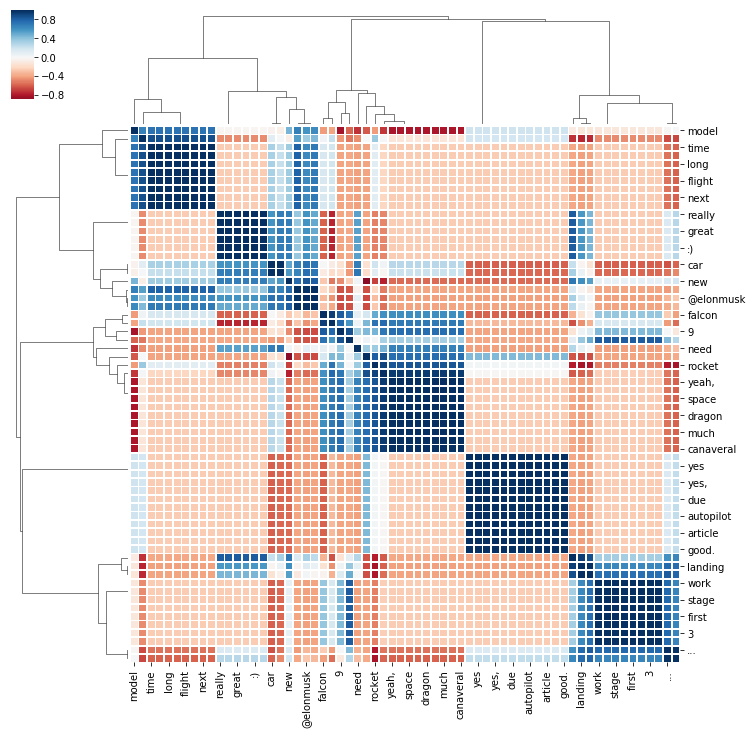

In [520]:
%matplotlib inline

g=sns.clustermap(df_lda_T.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [126]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [127]:
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      48.844807        1       1   14.341399 -186.564774
1      20.812606        1       2  -50.495049   24.672075
4      10.188267        1       3 -138.615326 -113.478516
3      10.078286        1       4  141.740891  -84.266754
2      10.076035        1       5  103.430138   80.867889, topic_info=     Category       Freq          Term      Total  loglift  logprob
term                                                               
580   Default  20.000000         model  20.000000  30.0000  30.0000
329   Default   9.000000        launch   9.000000  29.0000  29.0000
231   Default  29.000000         tesla  29.000000  28.0000  28.0000
15    Default   6.000000      @spacex:   6.000000  27.0000  27.0000
90    Default   9.000000        rocket   9.000000  26.0000  26.0000
82    Default   8.000000        falcon   8.000000  25.0000  25.0000
272   Default   5.000000           ...   5.000000  24.0000  24.0000
322   Default   5.000000        dragon   5.000000  23.0000  23.0000
324   Default   5.000000          next   5.000000  22.0000  22.0000
10    Default  11.000000          like  11.000000  21.0000  21.0000
256   Default   4.000000             9   4.000000  20.0000  20.0000
881   Default   3.000000         space   3.000000  19.0000  19.0000
407   Default   5.000000             w   5.000000  18.0000  18.0000
160   Default   5.000000         would   5.000000  17.0000  17.0000
27    Default   4.000000            :)   4.000000  16.0000  16.0000
286   Default   3.000000          test   3.000000  15.0000  15.0000
147   Default   8.000000          good   8.000000  14.0000  14.0000
1198  Default   1.000000        change   1.000000  13.0000  13.0000
1394  Default   7.000000     @elonmusk   7.000000  12.0000  12.0000
111   Default   2.000000           i'm   2.000000  11.0000  11.0000
494   Default   2.000000          much   2.000000  10.0000  10.0000
1347  Default   7.000000  @teslamotors   7.000000   9.0000   9.0000
170   Default   5.000000       @spacex   5.000000   8.0000   8.0000
153   Default   2.000000           yes   2.000000   7.0000   7.0000
1129  Default   4.000000          time   4.000000   6.0000   6.0000
1423  Default   1.000000          cape   1.000000   5.0000   5.0000
3207  Default   3.000000        flight   3.000000   4.0000   4.0000
1106  Default   2.000000          live   2.000000   3.0000   3.0000
1274  Default   0.000000        review   0.000000   2.0000   2.0000
503   Default   3.000000          best   3.000000   1.0000   1.0000
...       ...        ...           ...        ...      ...      ...
150    Topic5   0.392949       several   0.695232   1.7244  -6.7156
589    Topic5   0.614207          btw,   1.401753   1.4699  -6.2689
27     Topic5   1.224056            :)   4.280399   1.0431  -5.5793
2895   Topic5   0.669865       climate   1.630144   1.4057  -6.1822
342    Topic5   0.816529        coming   2.484191   1.1824  -5.9842
289    Topic5   0.401116        unveil   0.732049   1.6934  -6.6950
329    Topic5   1.662408        launch   9.622503   0.5392  -5.2732
144    Topic5   0.677185          yes,   1.991892   1.2161  -6.1713
1110   Topic5   0.593430         watch   1.602775   1.3014  -6.3033
256    Topic5   0.998671             9   4.695791   0.7470  -5.7828
1129   Topic5   0.965731          time   4.418618   0.7743  -5.8164
10     Topic5   1.434725          like  11.356449   0.2262  -5.4205
90     Topic5   1.308232        rocket   9.578774   0.3041  -5.5128
286    Topic5   0.852260          test   3.881351   0.7790  -5.9414
2823   Topic5   0.617023           end   1.878318   1.1818  -6.2644
1713   Topic5   0.592450         good.   1.731057   1.2228  -6.3050
6413   Topic5   0.600116             v   1.802064   1.1954  -6.2921
580    Topic5   1.627665         model  20.004058  -0.2138  -5.2944
82     Topic5   1.142026        falcon   8.523512   0.2850  -5.6487
1397   Topic5  

In [74]:
class Elon_Musk():
    def __init__(self, df):  
        self.df = df
        
    def Topics(self, stoplist, n_components, num_words):
        
        # Prepare proper data structure for gensim
        tweet=[]
        for i in range(len(self.df['Tweet'])):
            temp=self.df['Tweet'].iloc[i]
            tweet.append(temp)
            
        texts = []
        for document in tweet:
            text = [word for word in str(document).lower().split() if word not in stoplist]
            texts.append(text)

        self.dictionary = corpora.Dictionary(texts)
        corpus = [self.dictionary.doc2bow(text) for text in texts]
        
        # Tfidf in gensim
        tfidf = models.TfidfModel(corpus) 
        corpus_tfidf = tfidf[corpus] # fit the model

        # LDA in gensim
        self.lda = models.LdaModel(corpus, id2word=self.dictionary, num_topics=n_components)
        self.corpus_lda = self.lda[corpus_tfidf] # fit the model
        
        print(self.lda.show_topics(n_components,num_words))
        
    def LDA_plot(self):
        import pyLDAvis.gensim

        pyLDAvis.enable_notebook()
        self.panel = pyLDAvis.gensim.prepare(self.lda, self.corpus_lda, self.dictionary, mds='tsne')

In [77]:
em_2012 = Elon_Musk(groups[0])
em_2012.Topics(stoplist, 2, 10)
em_2012.LDA_plot()
em_2012.panel

[(0, '0.008*"rocket" + 0.007*"model" + 0.006*"tesla" + 0.005*"like" + 0.004*"stock" + 0.004*"millions" + 0.004*"breaking:" + 0.004*"mars" + 0.004*"people" + 0.004*"..." + 0.004*"rover" + 0.004*"cowboy" + 0.004*"mars." + 0.004*"year" + 0.004*"short" + 0.004*"would" + 0.004*"ariane" + 0.004*"vid" + 0.004*"v" + 0.004*"40"'), (1, '0.009*"tesla" + 0.007*"spacex" + 0.006*"study" + 0.005*"would" + 0.005*"think" + 0.005*"go" + 0.004*"auto" + 0.004*"public" + 0.004*"little" + 0.004*"space" + 0.004*"i\'m" + 0.004*"london" + 0.004*"much" + 0.004*"interesting" + 0.004*"new" + 0.004*"solar" + 0.004*"v" + 0.004*"great" + 0.004*"ariane" + 0.004*"powered"')]


C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics            x           y
topic                                                     
1      69.817398        1       1  2352.815430 -5514.87207
0      30.182602        1       2 -2352.815186  5514.87207, topic_info=     Category      Freq                  Term     Total  loglift  logprob
term                                                                     
47    Default  0.000000                rocket  0.000000  30.0000  30.0000
15    Default  0.000000                 model  0.000000  29.0000  29.0000
221   Default  0.000000                 stock  0.000000  28.0000  28.0000
329   Default  0.000000              millions  0.000000  27.0000  27.0000
232   Default  0.000000             breaking:  0.000000  26.0000  26.0000
348   Default  0.000000                  mars  0.000000  25.0000  25.0000
333   Default  0.000000                people  0.000000  24.0000  24.0000
224   Default  0.000000                   ...  0.000000  23.0000  23.0000
418   Default  0.000000                 rover  0.000000  22.0000  22.0000
43    Default  0.000000                cowboy  0.000000  21.0000  21.0000
328   Default  0.000000                 mars.  0.000000  20.0000  20.0000
358   Default  0.000000                 short  0.000000  19.0000  19.0000
62    Default  0.000000                   vid  0.000000  18.0000  18.0000
414   Default  0.000000                  like  0.000000  17.0000  17.0000
48    Default  0.000000                    40  0.000000  16.0000  16.0000
53    Default  0.000000                single  0.000000  15.0000  15.0000
271   Default  0.000000              possible  0.000000  14.0000  14.0000
296   Default  0.000000     #awesomexmasgifts  0.000000  13.0000  13.0000
303   Default  0.000000            uzbekistan  0.000000  12.0000  12.0000
455   Default  0.000000                  even  0.000000  11.0000  11.0000
449   Default  0.000000               @yousrc  0.000000  10.0000  10.0000
459   Default  0.000000                   say  0.000000   9.0000   9.0000
301   Default  0.000000                   ore  0.000000   8.0000   8.0000
453   Default  0.000000                 chose  0.000000   7.0000   7.0000
461   Default  0.000000                 that.  0.000000   6.0000   6.0000
426   Default  0.000000             molecules  0.000000   5.0000   5.0000
452   Default  0.000000               article  0.000000   4.0000   4.0000
454   Default  0.000000                editor  0.000000   3.0000   3.0000
300   Default  0.000000  http://t.co/jqwajrny  0.000000   2.0000   2.0000
69    Default  0.000000           perspective  0.000000   1.0000   1.0000
...       ...       ...                   ...       ...      ...      ...
66     Topic2  0.045734          grasshopper,  0.084126   0.5884  -5.8943
456    Topic2  0.045705                 fair,  0.084161   0.5874  -5.8950
419    Topic2  0.045650              ?@wired:  0.084228   0.5854  -5.8962
71     Topic2  0.045638                  size  0.084243   0.5849  -5.8964
299    Topic2  0.045618            convenient  0.084268   0.5842  -5.8969
457    Topic2  0.045602              headline  0.084287   0.5836  -5.8972
328    Topic2  0.068347                 mars.  0.126500   0.5823  -5.4926
460    Topic2  0.045564           sensational  0.084334   0.5822  -5.8981
15     Topic2  0.111835                 model  0.213378   0.5519  -5.0002
47     Topic2  0.130262                rocket  0.260882   0.5034  -4.8476
358    Topic2  0.064795                 short  0.130853   0.4951  -5.5460
62     Topic2  0.061670                   vid  0.134683   0.4168  -5.5954
48     Topic2  0.061341                    40  0.135087   0.4084  -5.6007
53     Topic2  0.061315                single  0.135118   0.4078  -5.6012
414    Topic2  0.074924                  like  0.188527   0.2751  -5.4007
271    Topic2  0.060177              possible  0.136513   0.3788  -5.6199
17     Topic2  0.103763                 tesla  0.433540  -0.2320  -5.0751
92     Topic2  0.0571

In [82]:
em_2013 = Elon_Musk(groups[1])

em_2013.Topics(stoplist, 2, 10)

em_2013.LDA_plot()

em_2013.panel

[(0, '0.007*"tesla" + 0.006*"model" + 0.004*"rocket" + 0.003*"w" + 0.003*"launch" + 0.002*"would" + 0.002*"like" + 0.002*"time" + 0.002*"people" + 0.002*"one"'), (1, '0.009*"tesla" + 0.005*"model" + 0.005*"launch" + 0.005*"good" + 0.004*"like" + 0.004*"rocket" + 0.004*"..." + 0.004*"@teslamotors" + 0.003*"w" + 0.003*"@elonmusk"')]


C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics            x           y
topic                                                     
1      72.143589        1       1  2352.815430 -5514.87207
0      27.856411        1       2 -2352.815186  5514.87207, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
20    Default  2.000000         model  2.000000  30.0000  30.0000
56    Default  1.000000        rocket  1.000000  29.0000  29.0000
219   Default  4.000000         tesla  4.000000  28.0000  28.0000
964   Default  0.000000         would  0.000000  27.0000  27.0000
684   Default  0.000000           lot  0.000000  26.0000  26.0000
437   Default  0.000000          time  0.000000  25.0000  25.0000
1023  Default  0.000000         could  0.000000  24.0000  24.0000
114   Default  1.000000             w  1.000000  23.0000  23.0000
883   Default  0.000000           one  0.000000  22.0000  22.0000
45    Default  0.000000          term  0.000000  21.0000  21.0000
1912  Default  0.000000            tx  0.000000  20.0000  20.0000
507   Default  0.000000        people  0.000000  19.0000  19.0000
40    Default  0.000000          long  0.000000  18.0000  18.0000
841   Default  0.000000          btw,  0.000000  17.0000  17.0000
424   Default  0.000000        flight  0.000000  16.0000  16.0000
545   Default  0.000000  supercharger  0.000000  15.0000  15.0000
1679  Default  0.000000  announcement  0.000000  14.0000  14.0000
342   Default  0.000000      actually  0.000000  13.0000  13.0000
352   Default  0.000000         might  0.000000  12.0000  12.0000
459   Default  0.000000         coast  0.000000  11.0000  11.0000
1040  Default  0.000000         sales  0.000000  10.0000  10.0000
1717  Default  0.000000        coming  0.000000   9.0000   9.0000
410   Default  0.000000         super  0.000000   8.0000   8.0000
536   Default  0.000000           new  0.000000   7.0000   7.0000
1163  Default  0.000000        tesla.  0.000000   6.0000   6.0000
621   Default  0.000000       climate  0.000000   5.0000   5.0000
6     Default  0.000000        really  0.000000   4.0000   4.0000
1235  Default  0.000000           say  0.000000   3.0000   3.0000
1087  Default  0.000000         allow  0.000000   2.0000   2.0000
1036  Default  0.000000        direct  0.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
424    Topic2  0.204095        flight  0.455169   0.4760  -6.4828
883    Topic2  0.274168           one  0.682695   0.3658  -6.1876
437    Topic2  0.289633          time  0.742088   0.3373  -6.1327
545    Topic2  0.203626  supercharger  0.455742   0.4725  -6.4851
56     Topic2  0.566725        rocket  1.891005   0.0731  -5.4615
219    Topic2  0.965352         tesla  4.144128  -0.1788  -4.9289
40     Topic2  0.251116          long  0.632579   0.3542  -6.2754
1679   Topic2  0.216998  announcement  0.517693   0.4086  -6.4215
1040   Topic2  0.164540         sales  0.346929   0.5321  -6.6982
507    Topic2  0.278631        people  0.755538   0.2806  -6.1715
114    Topic2  0.438057             w  1.500218   0.0471  -5.7190
342    Topic2  0.213784      actually  0.521622   0.3861  -6.4364
1087   Topic2  0.144930         allow  0.292606   0.5755  -6.8251
1235   Topic2  0.159279           say  0.353362   0.4813  -6.7307
410    Topic2  0.188367         super  0.474398   0.3545  -6.5630
536    Topic2  0.227002           new  0.662061   0.2077  -6.3764
621    Topic2  0.225601       climate  0.663773   0.1989  -6.3826
6      Topic2  0.186120        really  0.477144   0.3367  -6.5750
468    Topic2  0.235394         first  0.808400   0.0443  -6.3401
131    Topic2  0.346219        launch  2.003999  -0.4777  -5.9543
61     Topic2  0.316555          like  1.648768  -0.3722  -6.0439
83     Topic2  0.268142        thanks  1.159860  -0.1864  -6.2098
444    Topic2  0.214537        change  0.755601   0.0191  -6.4329
89     Topic2  0.272923  

In [84]:
em_2014 = Elon_Musk(groups[2])
em_2014.Topics(stoplist, 5, 10)
em_2014.LDA_plot()
em_2014.panel

[(0, '0.011*"model" + 0.010*"tesla" + 0.007*"@teslamotors" + 0.006*"rocket" + 0.006*"landing" + 0.005*"deploy" + 0.005*"show" + 0.004*"car" + 0.004*"also" + 0.004*"us"'), (1, '0.009*"tesla" + 0.005*"flight" + 0.004*"would" + 0.004*"@spacex" + 0.004*"..." + 0.004*"falcon" + 0.004*"@spacex:" + 0.004*"model" + 0.004*"rocket" + 0.003*"new"'), (2, '0.010*"launch" + 0.008*"new" + 0.006*"like" + 0.006*"model" + 0.005*"falcon" + 0.005*"time" + 0.005*"dragon" + 0.004*"w" + 0.004*"contract" + 0.004*"9"'), (3, '0.011*"tesla" + 0.005*":)" + 0.005*"model" + 0.005*"us" + 0.005*"sure" + 0.005*"worth" + 0.005*"make" + 0.005*"made" + 0.004*"record" + 0.004*"it!"'), (4, '0.011*"falcon" + 0.009*"9" + 0.006*"like" + 0.006*"tesla" + 0.006*"landing" + 0.006*"flight" + 0.005*"model" + 0.004*"space" + 0.004*"next" + 0.004*"grid"')]


C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      51.511219        1       1  117.760574   82.676086
1      18.480273        1       2 -152.839066  -14.771764
3      10.003191        1       3  -44.683067  120.237305
2      10.002803        1       4  -10.599600 -102.678795
0      10.002515        1       5  155.790863  -86.078278, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
78    Default  1.000000         tesla  1.000000  30.0000  30.0000
16    Default  1.000000         model  1.000000  29.0000  29.0000
95    Default  0.000000        launch  0.000000  28.0000  28.0000
5     Default  0.000000          like  0.000000  27.0000  27.0000
128   Default  0.000000           new  0.000000  26.0000  26.0000
135   Default  0.000000  @teslamotors  0.000000  25.0000  25.0000
347   Default  0.000000            us  0.000000  24.0000  24.0000
101   Default  0.000000          time  0.000000  23.0000  23.0000
161   Default  1.000000       landing  1.000000  22.0000  22.0000
205   Default  0.000000        rocket  0.000000  21.0000  21.0000
481   Default  0.000000            :)  0.000000  20.0000  20.0000
885   Default  0.000000          made  0.000000  19.0000  19.0000
899   Default  0.000000          sure  0.000000  18.0000  18.0000
354   Default  0.000000        record  0.000000  17.0000  17.0000
239   Default  0.000000          show  0.000000  16.0000  16.0000
186   Default  0.000000        deploy  0.000000  15.0000  15.0000
668   Default  0.000000          make  0.000000  14.0000  14.0000
227   Default  0.000000           ...  0.000000  13.0000  13.0000
744   Default  0.000000         worth  0.000000  12.0000  12.0000
155   Default  0.000000          test  0.000000  11.0000  11.0000
457   Default  0.000000         space  0.000000  10.0000  10.0000
1063  Default  0.000000      contract  0.000000   9.0000   9.0000
369   Default  0.000000        dragon  0.000000   8.0000   8.0000
505   Default  0.000000             w  0.000000   7.0000   7.0000
233   Default  0.000000           car  0.000000   6.0000   6.0000
463   Default  0.000000       @spacex  0.000000   5.0000   5.0000
103   Default  0.000000          also  0.000000   4.0000   4.0000
682   Default  0.000000           it!  0.000000   3.0000   3.0000
884   Default  0.000000         la-ny  0.000000   2.0000   2.0000
150   Default  1.000000        flight  1.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
1216   Topic5  0.031292     insertion  0.083600   1.3196  -6.6045
1549   Topic5  0.031291   @plugshare:  0.083605   1.3195  -6.6045
1579   Topic5  0.031286       network  0.083599   1.3195  -6.6047
824    Topic5  0.031287      reentry,  0.083602   1.3195  -6.6047
29     Topic5  0.031287        grand,  0.083608   1.3194  -6.6046
1200   Topic5  0.031283          odds  0.083610   1.3193  -6.6048
349    Topic5  0.031284          @wsj  0.083615   1.3192  -6.6047
957    Topic5  0.031282        forum.  0.083611   1.3192  -6.6048
1240   Topic5  0.031281       attempt  0.083609   1.3192  -6.6048
239    Topic5  0.114863          show  0.328718   1.2509  -5.3041
135    Topic5  0.161955  @teslamotors  0.568565   1.0465  -4.9605
750    Topic5  0.057318         yeah,  0.172339   1.2015  -5.9992
564    Topic5  0.043068         japan  0.125614   1.2319  -6.2851
16     Topic5  0.248326         model  1.195006   0.7312  -4.5331
103    Topic5  0.083464          also  0.342004   0.8919  -5.6234
355    Topic5  0.057343         sales  0.199168   1.0572  -5.9988
23     Topic5  0.047700           ai.  0.153214   1.1354  -6.1829
205    Topic5  0.145220        rocket  0.786194   0.6134  -5.0696
78     Topic5  0.234317         tesla  1.688939   0.3272  -4.5912
161    Topic5  0.135648       landing  1.009604   0.2951  -5.1378
481    Topic5  0.068394            :)  0.294790   0.8